# Importing Libraries 

In [9]:
import numpy as np # mathematical computation
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
from matplotlib import pyplot
import seaborn as sns # visualization
import warnings 
warnings.filterwarnings('ignore') #ignore warnings

#machine Learning models Libraries
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

#Preprocessing related Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#Date related Libraries
from datetime import date
#import holidays
import datetime


### Loading training dataset 

In [10]:
train = pd.read_csv('walmart_train.csv')
train

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]

- Train data has the information of sales for each week from 05-Feb-2010 to 26-Oct-2012

In [11]:
#checking for null values in training dataset
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

### Loading testing dataset

In [12]:
test = pd.read_csv('walmart_test.csv')
test

Store  Dept        Date  IsHoliday
0           1     1  2012-11-02      False
1           1     1  2012-11-09      False
2           1     1  2012-11-16      False
3           1     1  2012-11-23       True
4           1     1  2012-11-30      False
...       ...   ...         ...        ...
115059     45    98  2013-06-28      False
115060     45    98  2013-07-05      False
115061     45    98  2013-07-12      False
115062     45    98  2013-07-19      False
115063     45    98  2013-07-26      False

[115064 rows x 4 columns]

In [13]:
#Checking null values for testing dataset
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

### Loading features dataset

In [14]:
features = pd.read_csv('walmart_features.csv')
features

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [15]:
#checking null values for features dataset
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

### Loading stores dataset 

In [16]:
stores = pd.read_csv('walmart_stores.csv')
stores

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [17]:
#Checking null values for stores dataset
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

# Data Cleaning

## Handling missing values

- only features variable has null values.

In [18]:
percent_missing = features.isnull().sum() * 100 / len(features)
missing_value = pd.DataFrame({'column_name': features.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value

column_name  percent_missing
Store                   0         0.000000
Date                    0         0.000000
Temperature             0         0.000000
Fuel_Price              0         0.000000
MarkDown1            4158        50.769231
MarkDown2            5269        64.334554
MarkDown3            4577        55.885226
MarkDown4            4726        57.704518
MarkDown5            4140        50.549451
CPI                   585         7.142857
Unemployment          585         7.142857
IsHoliday               0         0.000000

- CPI and Unemployment columns has just 7% of missing data, so filling missing data with the mean or median of the respective column

In [19]:
features.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

<AxesSubplot:xlabel='CPI'>

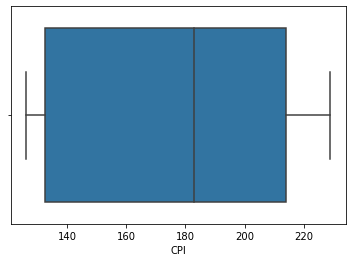

In [20]:
import seaborn as sns
sns.boxplot(x=features['CPI'])

#### There are no outliers in the CPI column in features variable. So nan values can be replace with mean of that particular column.

In [21]:
features['CPI'].fillna((features['CPI'].mean()), inplace=True)

In [22]:
percent_missing = features.isnull().sum() * 100 / len(features)
missing_value = pd.DataFrame({'column_name': features.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value

column_name  percent_missing
Store                   0         0.000000
Date                    0         0.000000
Temperature             0         0.000000
Fuel_Price              0         0.000000
MarkDown1            4158        50.769231
MarkDown2            5269        64.334554
MarkDown3            4577        55.885226
MarkDown4            4726        57.704518
MarkDown5            4140        50.549451
CPI                     0         0.000000
Unemployment          585         7.142857
IsHoliday               0         0.000000

- All the null values in CPI column are filled with mean value of the CPI column

<AxesSubplot:xlabel='Unemployment'>

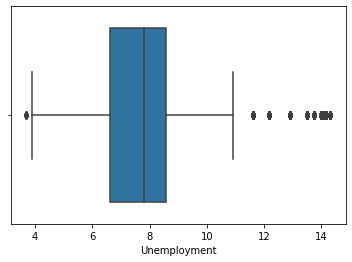

In [23]:
sns.boxplot(x=features['Unemployment'])

#### As Unemployment column has few outliers and mean will be affected by the outliers, replacing all the null values in Unemployement column with median value

In [24]:
features['Unemployment'].fillna((features['Unemployment'].median()), inplace=True)

In [25]:
percent_missing = features.isnull().sum() * 100 / len(features)
missing_value = pd.DataFrame({'column_name': features.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value

column_name  percent_missing
Store                   0         0.000000
Date                    0         0.000000
Temperature             0         0.000000
Fuel_Price              0         0.000000
MarkDown1            4158        50.769231
MarkDown2            5269        64.334554
MarkDown3            4577        55.885226
MarkDown4            4726        57.704518
MarkDown5            4140        50.549451
CPI                     0         0.000000
Unemployment            0         0.000000
IsHoliday               0         0.000000

- All the null values in Unemployment columns are filled with median value of the Unemployment column

- As MarkDowns have missing values more than 50%  all nans are replacing with zeros

In [26]:
from statistics import mean

features['MarkDown1'] = features['MarkDown1'].fillna(0)
features['MarkDown2'] = features['MarkDown2'].fillna(0)
features['MarkDown3'] = features['MarkDown3'].fillna(0)
features['MarkDown4'] = features['MarkDown4'].fillna(0)
features['MarkDown5'] = features['MarkDown5'].fillna(0)

In [27]:
percent_missing = features.isnull().sum() * 100 / len(features)
missing_value = pd.DataFrame({'column_name': features.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value

column_name  percent_missing
Store                   0              0.0
Date                    0              0.0
Temperature             0              0.0
Fuel_Price              0              0.0
MarkDown1               0              0.0
MarkDown2               0              0.0
MarkDown3               0              0.0
MarkDown4               0              0.0
MarkDown5               0              0.0
CPI                     0              0.0
Unemployment            0              0.0
IsHoliday               0              0.0

- Now all the null values are filled and the data is ready for analysis

### Handling negative values in train data

In [28]:
train.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

- In weekly_Sales column minimum value is the negative values. Sales should always be in zero or in positive rate

In [29]:
train[train.Weekly_Sales<0]

Store  Dept        Date  Weekly_Sales  IsHoliday
846         1     6  2012-08-10       -139.65      False
2384        1    18  2012-05-04         -1.27      False
6048        1    47  2010-02-19       -863.00      False
6049        1    47  2010-03-12       -698.00      False
6051        1    47  2010-10-08        -58.00      False
...       ...   ...         ...           ...        ...
419597     45    80  2010-02-12         -0.43       True
419598     45    80  2010-02-19         -0.27      False
419603     45    80  2010-04-16         -1.61      False
419614     45    80  2010-07-02         -0.27      False
419640     45    80  2011-02-11         -0.24       True

[1285 rows x 5 columns]

- Total 1285 negative values are there in Weekly_Sales

In [30]:
#Taking values greater than or equal to zero
train = train[train.Weekly_Sales>=0]
train

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[420285 rows x 5 columns]

- The final training data has 420285 rows

# Exploratory Data Analysis

## Exploring train data

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420285 non-null  int64  
 1   Dept          420285 non-null  int64  
 2   Date          420285 non-null  object 
 3   Weekly_Sales  420285 non-null  float64
 4   IsHoliday     420285 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 16.4+ MB


In [32]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [33]:
#Date column is in object format. Converting date column into datetime type as it's not possible to perform any time series based operation on the dates if they are not in the object format.

In [34]:
train['Date'] = pd.to_datetime(train.Date)

In [35]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [36]:
#Converting 'IsHoliday' column values False to 0 and True to 1
train["IsHoliday"] = train["IsHoliday"].astype(int)

In [37]:
train.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50          0
1      1     1 2010-02-12      46039.49          1
2      1     1 2010-02-19      41595.55          0
3      1     1 2010-02-26      19403.54          0
4      1     1 2010-03-05      21827.90          0

In [38]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
dtype: object

In [39]:
#Exracting the time based feature from Date feature as we are predicting the sales.

In [40]:
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Week']=train['Date'].dt.week
train['Day']=train['Date'].dt.day
train['n_days']=(train['Date'].dt.date-train['Date'].dt.date.min()).apply(lambda x:x.days)
train.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Year  Month  Week  Day  \
0      1     1 2010-02-05      24924.50          0  2010      2     5    5   
1      1     1 2010-02-12      46039.49          1  2010      2     6   12   
2      1     1 2010-02-19      41595.55          0  2010      2     7   19   
3      1     1 2010-02-26      19403.54          0  2010      2     8   26   
4      1     1 2010-03-05      21827.90          0  2010      3     9    5   

   n_days  
0       0  
1       7  
2      14  
3      21  
4      28

In [41]:
train.tail()

Store  Dept       Date  Weekly_Sales  IsHoliday  Year  Month  Week  \
421565     45    98 2012-09-28        508.37          0  2012      9    39   
421566     45    98 2012-10-05        628.10          0  2012     10    40   
421567     45    98 2012-10-12       1061.02          0  2012     10    41   
421568     45    98 2012-10-19        760.01          0  2012     10    42   
421569     45    98 2012-10-26       1076.80          0  2012     10    43   

        Day  n_days  
421565   28     966  
421566    5     973  
421567   12     980  
421568   19     987  
421569   26     994

In [42]:
test.dtypes

Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object

In [43]:
test['Date'] = pd.to_datetime(test.Date)

In [44]:
test['Year']=test['Date'].dt.year
test['Month']=test['Date'].dt.month
test['Week']=test['Date'].dt.week
test['Day']=test['Date'].dt.day
test['n_days']=(test['Date'].dt.date-test['Date'].dt.date.min()).apply(lambda x:x.days)
test.head()

Store  Dept       Date  IsHoliday  Year  Month  Week  Day  n_days
0      1     1 2012-11-02      False  2012     11    44    2       0
1      1     1 2012-11-09      False  2012     11    45    9       7
2      1     1 2012-11-16      False  2012     11    46   16      14
3      1     1 2012-11-23       True  2012     11    47   23      21
4      1     1 2012-11-30      False  2012     11    48   30      28

#### Train data has the information of sales for 994 days

In [45]:
#Impact of holidays on sales
print("Holiday")
print(train[train['IsHoliday']==True]['Weekly_Sales'].describe())
print("Non-Holiday")
print(train[train['IsHoliday']==False]['Weekly_Sales'].describe())


Holiday
count     29563.000000
mean      17092.566220
std       27249.206776
min           0.000000
25%        2122.830000
50%        7997.860000
75%       21256.915000
max      693099.360000
Name: Weekly_Sales, dtype: float64
Non-Holiday
count    390722.000000
mean      15949.958317
std       22347.258698
min           0.000000
25%        2117.300000
50%        7636.080000
75%       20193.912500
max      406988.630000
Name: Weekly_Sales, dtype: float64


In [46]:
#Sales in holiday week are more than sales in non-holiday week

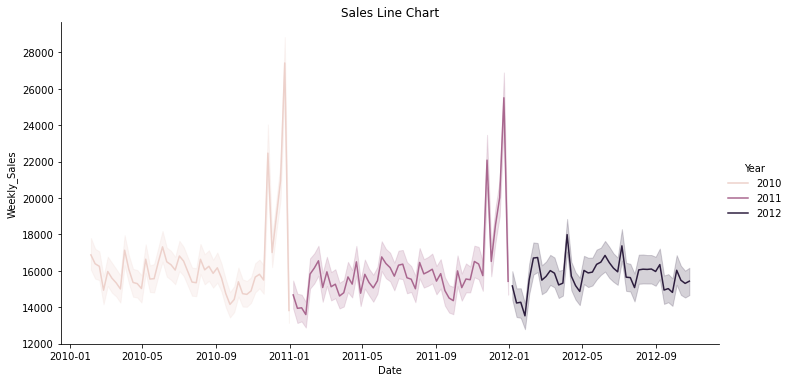

In [47]:
sns.relplot(x='Date',y='Weekly_Sales',hue='Year',data=train, kind='line',aspect=2)
plt.title("Sales Line Chart")
plt.show()

- It can be seen through Line chart that there is no trend in year wise and no random event also happens in any year.
- Also it can be seen that at the end of the year there is huge sales compared to other month which tells that Christmas and thanksgiving has more impact on sales compared to Super Bowl ,Labour Day.
- We can create features where we can give separate category for each holiday

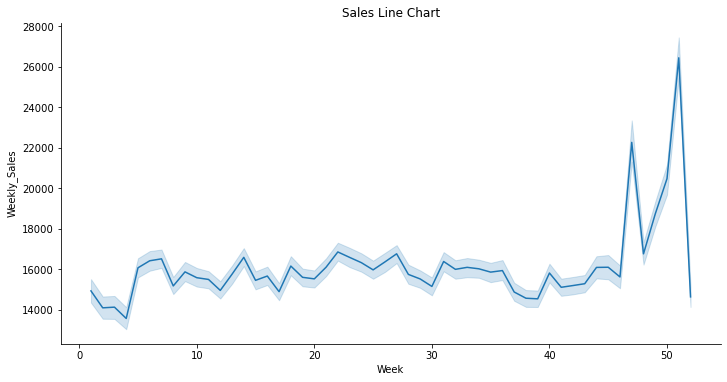

In [48]:
sns.relplot(x='Week',y='Weekly_Sales',data=train, kind='line',aspect=2)
plt.title("Sales Line Chart")
plt.show()

- This could be a useful feature as line is fluctuating for every week. Also week 45 to 50 have higher sales where Christmas and thanksgiving comes

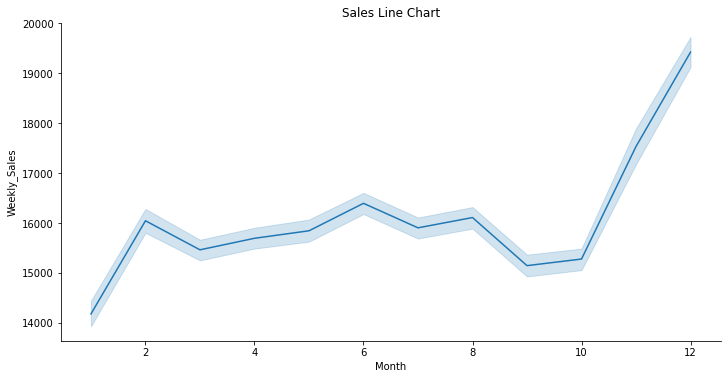

In [49]:
sns.relplot(x='Month',y='Weekly_Sales',data=train, kind='line',aspect=2)
plt.title("Sales Line Chart")
plt.show()

- It can be seen that in november and december sales are very high compared to other month wich tells the impact of thanksgiving and christmas on sales.

### Exploring Features data

In [50]:
features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        0.0        0.0   
1      1  2010-02-12        38.51       2.548        0.0        0.0   
2      1  2010-02-19        39.93       2.514        0.0        0.0   
3      1  2010-02-26        46.63       2.561        0.0        0.0   
4      1  2010-03-05        46.50       2.625        0.0        0.0   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        0.0        0.0        0.0  211.096358         8.106      False  
1        0.0        0.0        0.0  211.242170         8.106       True  
2        0.0        0.0        0.0  211.289143         8.106      False  
3        0.0        0.0        0.0  211.319643         8.106      False  
4        0.0        0.0        0.0  211.350143         8.106      False

In [51]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [52]:
features.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    8190.000000    8190.000000   
mean     23.000000    59.356198     3.405992    3462.090725    1206.981664   
std      12.987966    18.678607     0.431337    7388.916286    5495.556015   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000       0.000000       0.000000   
50%      23.000000    60.710000     3.513000       0.000000       0.000000   
75%      34.000000    73.880000     3.743000    4639.585000      98.590000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    8190.000000   8190.000000    8190.000000  8190.000000   8190.000000  
mean      776.464219   1392.763115    2043.403725   172.460809      7.825334  
std      7539.953758   4707.111488    9431.223215    38.292649      1.808971  
min      -179.260000      0.000000    -185.170000   126.064000      3.684000  
25%         0.000000      0.000000       0.000000   132.653774      6.833000  
50%         0.000000      0.000000       0.000000   172.460809      7.806000  
75%        24.220000    774.692500    2680.295000   212.766994      8.519000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

In [53]:
features['Date'] = pd.to_datetime(features.Date)

In [54]:
features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [55]:
#Converting 'IsHoliday' column values False to 0 and True to 1
features["IsHoliday"] = features["IsHoliday"].astype(int)

In [56]:
features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                int64
dtype: object

In [57]:
features.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
1      1 2010-02-12        38.51       2.548        0.0        0.0        0.0   
2      1 2010-02-19        39.93       2.514        0.0        0.0        0.0   
3      1 2010-02-26        46.63       2.561        0.0        0.0        0.0   
4      1 2010-03-05        46.50       2.625        0.0        0.0        0.0   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        0.0        0.0  211.096358         8.106          0  
1        0.0        0.0  211.242170         8.106          1  
2        0.0        0.0  211.289143         8.106          0  
3        0.0        0.0  211.319643         8.106          0  
4        0.0        0.0  211.350143         8.106          0

### Exploring stores data

In [58]:
stores['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

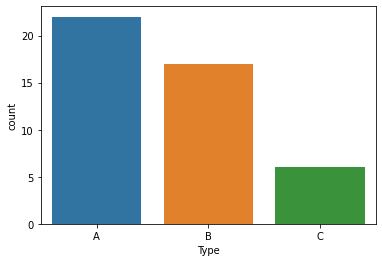

In [59]:
#Type of stores
sns.countplot(x='Type',data=stores)

### Exploring test data

In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Store      115064 non-null  int64         
 1   Dept       115064 non-null  int64         
 2   Date       115064 non-null  datetime64[ns]
 3   IsHoliday  115064 non-null  bool          
 4   Year       115064 non-null  int64         
 5   Month      115064 non-null  int64         
 6   Week       115064 non-null  int64         
 7   Day        115064 non-null  int64         
 8   n_days     115064 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(7)
memory usage: 7.1 MB


In [64]:
test.describe()

Store           Dept           Year          Month  \
count  115064.000000  115064.000000  115064.000000  115064.000000   
mean       22.238207      44.339524    2012.767182       5.729855   
std        12.809930      30.656410       0.422629       3.590331   
min         1.000000       1.000000    2012.000000       1.000000   
25%        11.000000      18.000000    2013.000000       3.000000   
50%        22.000000      37.000000    2013.000000       5.000000   
75%        33.000000      74.000000    2013.000000       7.000000   
max        45.000000      99.000000    2013.000000      12.000000   

                Week            Day         n_days  
count  115064.000000  115064.000000  115064.000000  
mean       23.050963      15.583536     132.610895  
std        15.750407       8.844900      78.792119  
min         1.000000       1.000000       0.000000  
25%        10.000000       8.000000      63.000000  
50%        20.000000      15.000000     133.000000  
75%        30.000000      23.000000     203.000000  
max        52.000000      31.000000     266.000000

In [65]:
test.dtypes

Store                 int64
Dept                  int64
Date         datetime64[ns]
IsHoliday              bool
Year                  int64
Month                 int64
Week                  int64
Day                   int64
n_days                int64
dtype: object

## Mearging train and test data with features and stores data

In [66]:
stores = stores.merge(features,on='Store',how='left')
stores

Store Type    Size       Date  Temperature  Fuel_Price  MarkDown1  \
0         1    A  151315 2010-02-05        42.31       2.572       0.00   
1         1    A  151315 2010-02-12        38.51       2.548       0.00   
2         1    A  151315 2010-02-19        39.93       2.514       0.00   
3         1    A  151315 2010-02-26        46.63       2.561       0.00   
4         1    A  151315 2010-03-05        46.50       2.625       0.00   
...     ...  ...     ...        ...          ...         ...        ...   
8185     45    B  118221 2013-06-28        76.05       3.639    4842.29   
8186     45    B  118221 2013-07-05        77.50       3.614    9090.48   
8187     45    B  118221 2013-07-12        79.37       3.614    3789.94   
8188     45    B  118221 2013-07-19        82.84       3.737    2961.49   
8189     45    B  118221 2013-07-26        76.06       3.804     212.02   

      MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0          0.00       0.00       0.00       0.00  211.096358         8.106   
1          0.00       0.00       0.00       0.00  211.242170         8.106   
2          0.00       0.00       0.00       0.00  211.289143         8.106   
3          0.00       0.00       0.00       0.00  211.319643         8.106   
4          0.00       0.00       0.00       0.00  211.350143         8.106   
...         ...        ...        ...        ...         ...           ...   
8185     975.03       3.00    2449.97    3169.69  172.460809         7.806   
8186    2268.58     582.74    5797.47    1514.93  172.460809         7.806   
8187    1827.31      85.72     744.84    2150.36  172.460809         7.806   
8188    1047.07     204.19     363.00    1059.46  172.460809         7.806   
8189     851.73       2.06      10.88    1864.57  172.460809         7.806   

      IsHoliday  
0             0  
1             1  
2             0  
3             0  
4             0  
...         ...  
8185          0  
8186          0  
8187          0  
8188          0  
8189          0  

[8190 rows x 14 columns]

In [67]:
train  = train.merge(stores,on=['Store','Date','IsHoliday'],how='left')
train

Store  Dept       Date  Weekly_Sales  IsHoliday  Year  Month  Week  \
0           1     1 2010-02-05      24924.50          0  2010      2     5   
1           1     1 2010-02-12      46039.49          1  2010      2     6   
2           1     1 2010-02-19      41595.55          0  2010      2     7   
3           1     1 2010-02-26      19403.54          0  2010      2     8   
4           1     1 2010-03-05      21827.90          0  2010      3     9   
...       ...   ...        ...           ...        ...   ...    ...   ...   
420280     45    98 2012-09-28        508.37          0  2012      9    39   
420281     45    98 2012-10-05        628.10          0  2012     10    40   
420282     45    98 2012-10-12       1061.02          0  2012     10    41   
420283     45    98 2012-10-19        760.01          0  2012     10    42   
420284     45    98 2012-10-26       1076.80          0  2012     10    43   

        Day  n_days  ...    Size  Temperature  Fuel_Price  MarkDown1  \
0         5       0  ...  151315        42.31       2.572       0.00   
1        12       7  ...  151315        38.51       2.548       0.00   
2        19      14  ...  151315        39.93       2.514       0.00   
3        26      21  ...  151315        46.63       2.561       0.00   
4         5      28  ...  151315        46.50       2.625       0.00   
...     ...     ...  ...     ...          ...         ...        ...   
420280   28     966  ...  118221        64.88       3.997    4556.61   
420281    5     973  ...  118221        64.89       3.985    5046.74   
420282   12     980  ...  118221        54.47       4.000    1956.28   
420283   19     987  ...  118221        56.47       3.969    2004.02   
420284   26     994  ...  118221        58.85       3.882    4018.91   

        MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0            0.00       0.00       0.00       0.00  211.096358         8.106  
1            0.00       0.00       0.00       0.00  211.242170         8.106  
2            0.00       0.00       0.00       0.00  211.289143         8.106  
3            0.00       0.00       0.00       0.00  211.319643         8.106  
4            0.00       0.00       0.00       0.00  211.350143         8.106  
...           ...        ...        ...        ...         ...           ...  
420280      20.64       1.50    1601.01    3288.25  192.013558         8.684  
420281       0.00      18.82    2253.43    2340.01  192.170412         8.667  
420282       0.00       7.89     599.32    3990.54  192.327265         8.667  
420283       0.00       3.18     437.73    1537.49  192.330854         8.667  
420284      58.08     100.00     211.94     858.33  192.308899         8.667  

[420285 rows x 21 columns]

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 420284
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420285 non-null  int64         
 1   Dept          420285 non-null  int64         
 2   Date          420285 non-null  datetime64[ns]
 3   Weekly_Sales  420285 non-null  float64       
 4   IsHoliday     420285 non-null  int64         
 5   Year          420285 non-null  int64         
 6   Month         420285 non-null  int64         
 7   Week          420285 non-null  int64         
 8   Day           420285 non-null  int64         
 9   n_days        420285 non-null  int64         
 10  Type          420285 non-null  object        
 11  Size          420285 non-null  int64         
 12  Temperature   420285 non-null  float64       
 13  Fuel_Price    420285 non-null  float64       
 14  MarkDown1     420285 non-null  float64       
 15  MarkDown2     420

In [69]:
test  = test.merge(stores,on=['Store','Date','IsHoliday'],how='left')
test

Store  Dept       Date IsHoliday  Year  Month  Week  Day  n_days Type  \
0           1     1 2012-11-02     False  2012     11    44    2       0    A   
1           1     1 2012-11-09     False  2012     11    45    9       7    A   
2           1     1 2012-11-16     False  2012     11    46   16      14    A   
3           1     1 2012-11-23      True  2012     11    47   23      21    A   
4           1     1 2012-11-30     False  2012     11    48   30      28    A   
...       ...   ...        ...       ...   ...    ...   ...  ...     ...  ...   
115059     45    98 2013-06-28     False  2013      6    26   28     238    B   
115060     45    98 2013-07-05     False  2013      7    27    5     245    B   
115061     45    98 2013-07-12     False  2013      7    28   12     252    B   
115062     45    98 2013-07-19     False  2013      7    29   19     259    B   
115063     45    98 2013-07-26     False  2013      7    30   26     266    B   

          Size  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0       151315        55.32       3.386    6766.44    5147.70      50.82   
1       151315        61.24       3.314   11421.32    3370.89      40.28   
2       151315        52.92       3.252    9696.28     292.10     103.78   
3       151315        56.23       3.211     883.59       4.17   74910.32   
4       151315        52.34       3.207    2460.03       0.00    3838.35   
...        ...          ...         ...        ...        ...        ...   
115059  118221        76.05       3.639    4842.29     975.03       3.00   
115060  118221        77.50       3.614    9090.48    2268.58     582.74   
115061  118221        79.37       3.614    3789.94    1827.31      85.72   
115062  118221        82.84       3.737    2961.49    1047.07     204.19   
115063  118221        76.06       3.804     212.02     851.73       2.06   

        MarkDown4  MarkDown5         CPI  Unemployment  
0         3639.90    2737.42  223.462779         6.573  
1         4646.79    6154.16  223.481307         6.573  
2         1133.15    6612.69  223.512911         6.573  
3          209.91     303.32  223.561947         6.573  
4          150.57    6966.34  223.610984         6.573  
...           ...        ...         ...           ...  
115059    2449.97    3169.69  172.460809         7.806  
115060    5797.47    1514.93  172.460809         7.806  
115061     744.84    2150.36  172.460809         7.806  
115062     363.00    1059.46  172.460809         7.806  
115063      10.88    1864.57  172.460809         7.806  

[115064 rows x 20 columns]

### Type of values in Stores datase

In [70]:
print("The shape of stores data set is: ", stores.shape)
print("The unique value of store is: ", stores['Store'].unique())
print("The unique value of Type is: ", stores['Type'].unique())
# As store size is a numerical real valued feature.

The shape of stores data set is:  (8190, 14)
The unique value of store is:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
The unique value of Type is:  ['A' 'B' 'C']


### The ratio of A,B and C type of walmart stores through pie chart

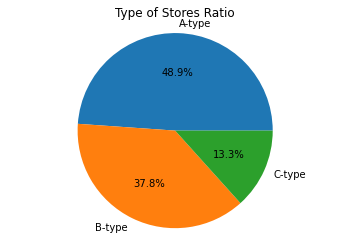

In [71]:
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100]
i_labels = 'A-type','B-type','C-type'
plt.pie(sizes,labels=i_labels,autopct='%1.1f%%')
plt.title('Type of Stores Ratio')
plt.axis('equal')
plt.show()

- Observation - There are many stores of A-type and very less stores of C-type

### Relationship between size and weekly_sales

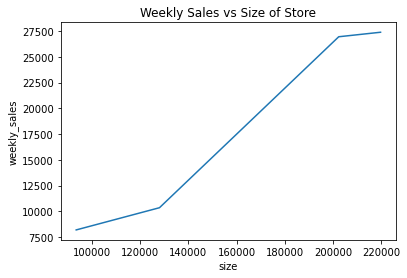

In [72]:
grouped_1=train.groupby('Size')
weekly_sales=list(grouped_1.mean()['Weekly_Sales'])
sq = (grouped_1['Size'].unique())
size = [i[0] for i in list(sq)]
weekly_sales = [x for _,x in sorted(zip(size,weekly_sales))]
size.sort()
sizes = []
for i in range(len(size)):
    if(i+1 == len(size)):
        sizes.append(size[i])
    elif ((i+1)%10==0):
        sizes.append(size[i])
weekly_sale=[]
for i in range(len(size)):
    if(i+1 == len(size)):
        weekly_sale.append(weekly_sales[i])
    elif ((i+1)%10==0):
        weekly_sale.append(weekly_sales[i])
weekly_sales
plt.plot(sizes, weekly_sale)
plt.title('Weekly Sales vs Size of Store')
plt.xlabel('size')
plt.ylabel('weekly_sales')
plt.show()

- Through this line chart it can be seen that as size increases, weekly sales also increases.

### sales of storefor each type of store using box plot 

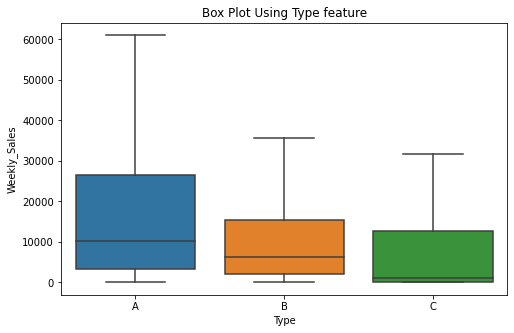

In [73]:
fig, ax = plt.subplots(figsize=(8, 5))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using Type feature")
plt.show()

- Through box plot ,we can see that median of each type of store decreases from left to right means from A store to C.
- So we can conclude that type is an import categorical feature to predict weekly sales. And plays role in increasing sales of a store.

### Average Store Sales - Year Wise


In [74]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

store_sales_2010 = train[train.Year==2010].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2010_df = pd.DataFrame(list(store_sales_2010.items()), columns=['Store', 'AvgSales2010'])

store_sales_2011 = train[train.Year==2011].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2011_df = pd.DataFrame(list(store_sales_2011.items()), columns=['Store', 'AvgSales2011'])

store_sales_2012 =train[train.Year==2012].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2012_df = pd.DataFrame(list(store_sales_2012.items()), columns=['Store', 'AvgSales2012'])

fig = make_subplots(rows=3, cols=1, subplot_titles=("Average Store Sales 2010", "Average Store Sales 2011", "Average Store Sales 2012"))

fig.add_trace(go.Bar(x=store2010_df.Store, y=store2010_df.AvgSales2010,),1, 1)

fig.add_trace(go.Bar(x=store2011_df.Store, y=store2011_df.AvgSales2011,),2, 1)

fig.add_trace(go.Bar(x=store2012_df.Store, y=store2012_df.AvgSales2012,),3, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False, height=1500)

fig.update_xaxes(title_text="Store", row=1, col=1)
fig.update_xaxes(title_text="Store", row=2, col=1)
fig.update_xaxes(title_text="Store", row=3, col=1)

fig.update_yaxes(title_text="AvgSales", row=1, col=1)
fig.update_yaxes(title_text="AvgSales", row=2, col=1)
fig.update_yaxes(title_text="AvgSales", row=3, col=1)

fig.update_xaxes(tick0=1, dtick=1)
fig.show()

- The overall trend of store sales over the 3 years remain the same as it depends on the type of store and its size

- The stores 2,4,13,14 and 20 showed the highest sales in all the 3 years

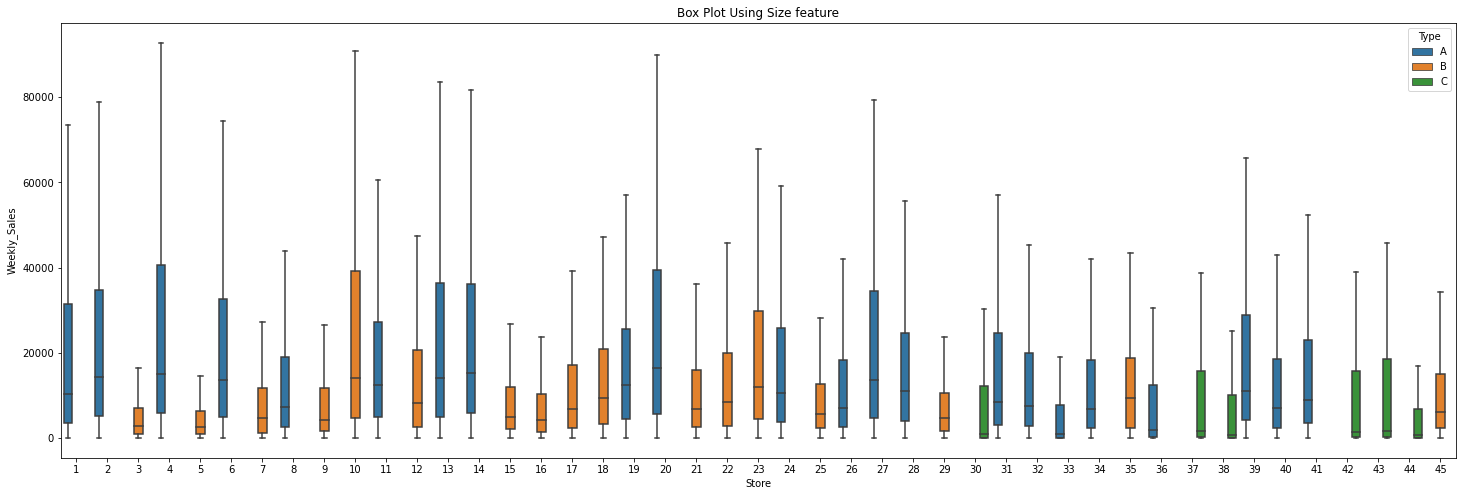

In [75]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x="Store",y='Weekly_Sales',data=train,showfliers=False, hue="Type")
plt.title("Box Plot Using Size feature")
plt.show()

- Store feature is an useful feature to predict sales. As it comprises of department, size or type and also region as well which was not provided in dataset.

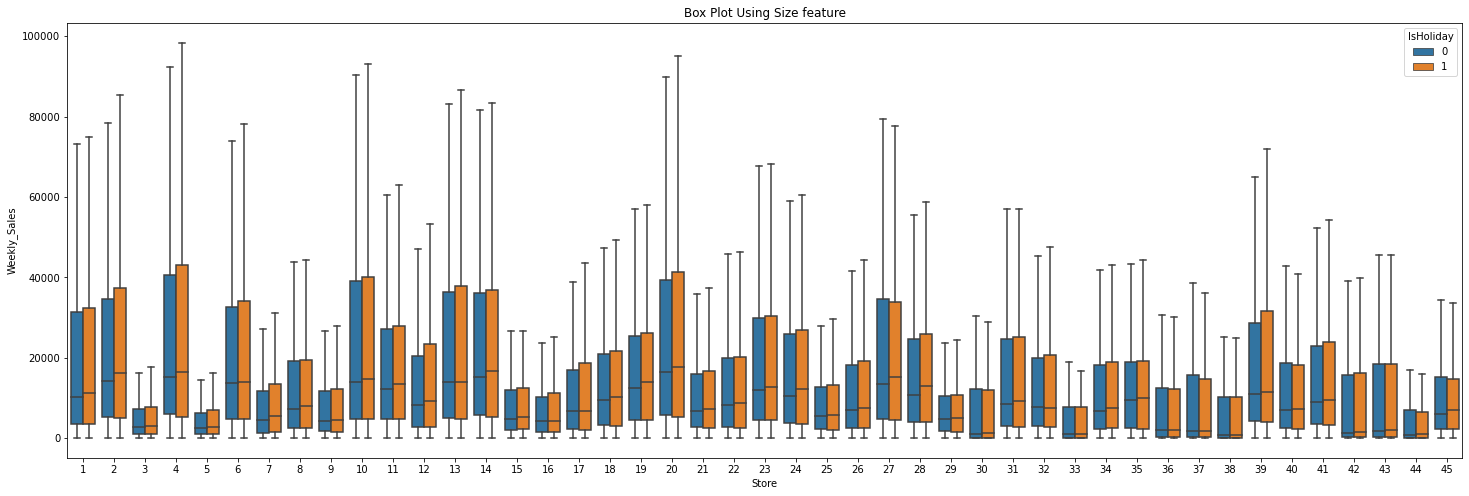

In [76]:
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=train, showfliers=False, hue="IsHoliday")
plt.title("Box Plot Using Size feature")
plt.show()

-  It can be seen that holidays has some impact on sales of store. for many store, sales have increased.

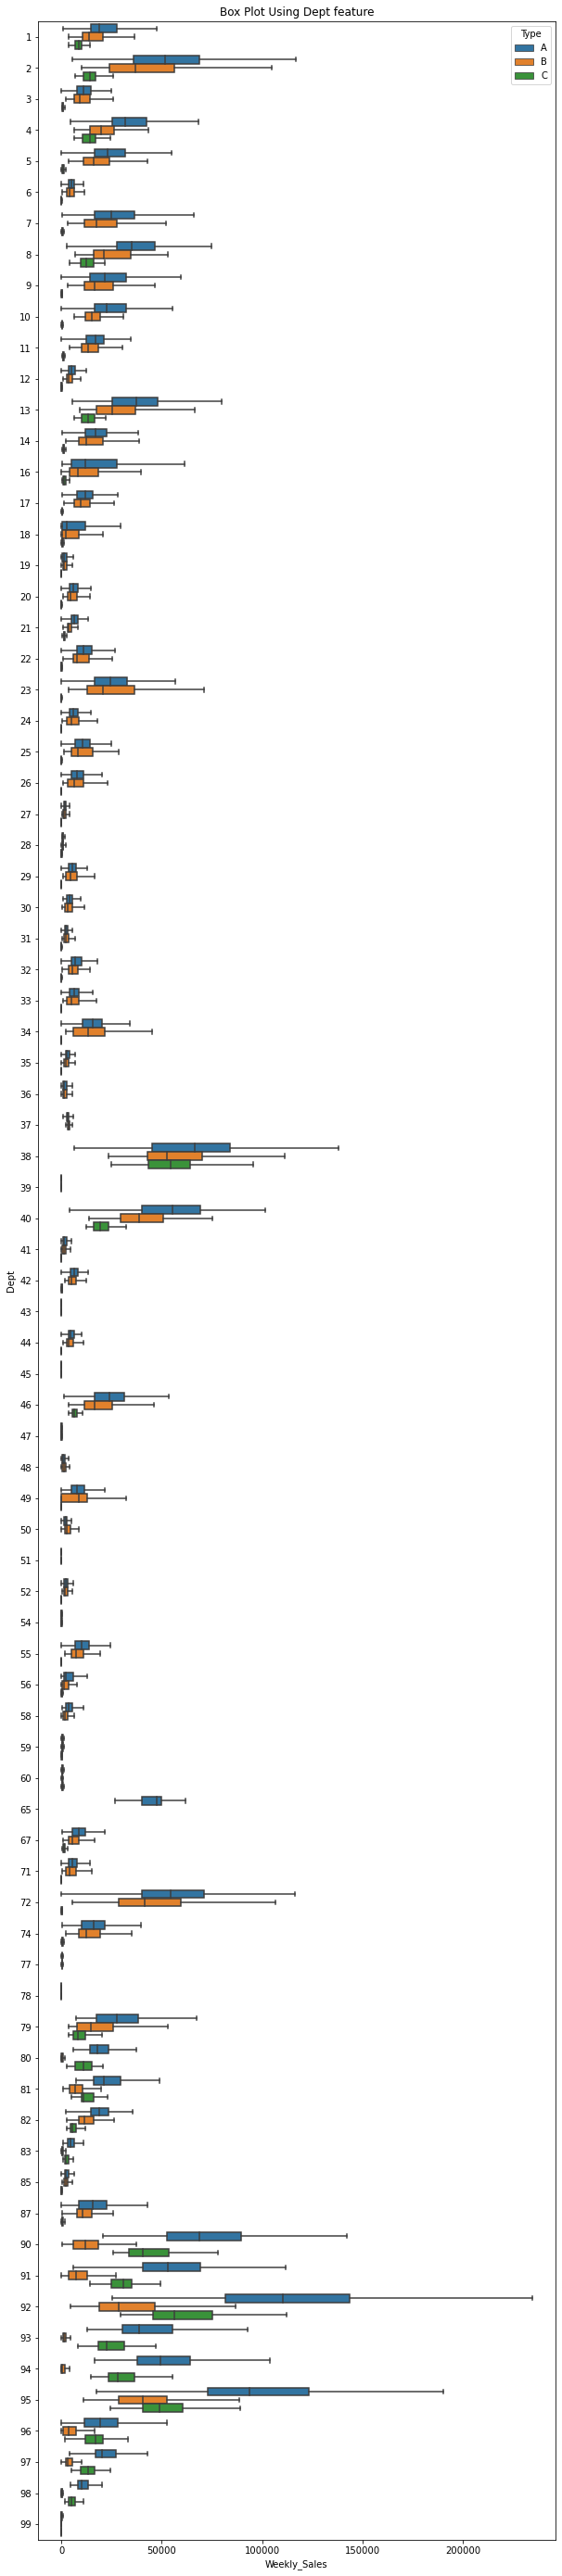

In [77]:
fig, ax = plt.subplots(figsize=(10, 50))
fig = sns.boxplot(y='Dept', x='Weekly_Sales', data=train, showfliers=False, hue="Type",orient="h") 
plt.title("Box Plot Using Dept feature")
plt.show()

- Department can be a factor in predicting sales as it can be seen through box plot that every department has a different sales than other. Further,  department factor is also correlated with type as it can be seen that type A has higher sales in most of the department.
- Notables are 38,65,72,92 and 95 which have highest average sales



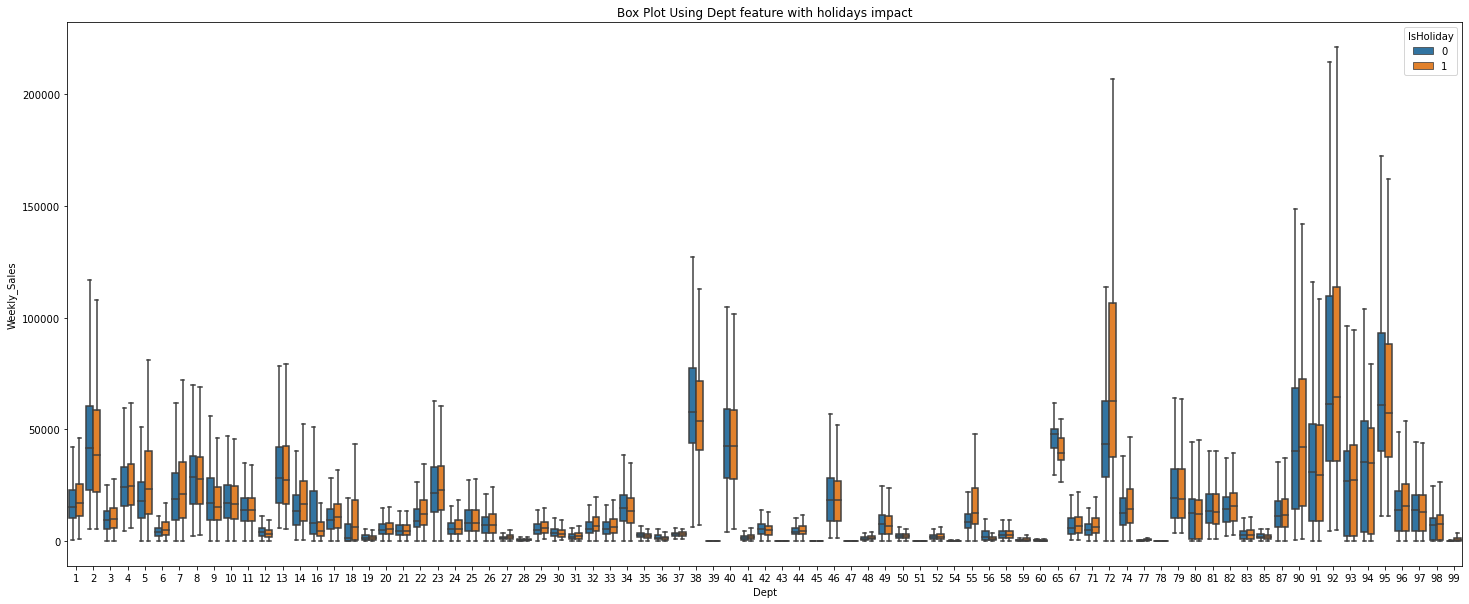

In [78]:
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=train, showfliers=False, hue="IsHoliday")
plt.title("Box Plot Using Dept feature with holidays impact")
plt.show()

- As it can be seen through Box plot, there is not much to conclude from it except that in most department sales increase but in some it even get lesser than normal week which can tell that some department  are not useful in holidays season.
- Now Let's create Month end feature and month start becasue people tend to have less salary at the end of month and at month start people get salary so let's check if has any impact on sales.


### Average Department Sales - Per Year

In [79]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

dept_sales_2010 = train[train.Year==2010].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2010_df = pd.DataFrame(list(dept_sales_2010.items()), columns=['Dept', 'AvgSales2010'])

dept_sales_2011 = train[train.Year==2011].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2011_df = pd.DataFrame(list(dept_sales_2011.items()), columns=['Dept', 'AvgSales2011'])

dept_sales_2012 = train[train.Year==2012].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2012_df = pd.DataFrame(list(dept_sales_2012.items()), columns=['Dept', 'AvgSales2012'])

fig = make_subplots(rows=1, cols=3, subplot_titles=("Average Dept Sales 2010", "Average Dept Sales 2011", "Average Dept Sales 2012"))

fig.add_trace(go.Bar(x=dept2010_df.AvgSales2010, y=dept2010_df.Dept, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=dept2011_df.AvgSales2011, y=dept2011_df.Dept, orientation='h',),1, 2)

fig.add_trace(go.Bar(x=dept2012_df.AvgSales2012, y=dept2012_df.Dept, orientation='h',),1, 3)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template = 'plotly_dark', showlegend=False, height=1000)

fig.update_xaxes(title_text="AvgSales", row=1, col=1)
fig.update_xaxes(title_text="AvgSales", row=1, col=2)
fig.update_xaxes(title_text="AvgSales", row=1, col=3)

fig.update_yaxes(title_text="Dept", row=1, col=1)
fig.update_yaxes(title_text="Dept", row=1, col=2)
fig.update_yaxes(title_text="Dept", row=1, col=3)

fig.update_yaxes(tick0=1, dtick=1)
fig.show()


- The sales trend on yearly basis remain the same. Stores with higher sales appeared in all the 3 years while with lowe sales showed the same trend in all the 3 years.



### Month wise Weekly Sales visualization 

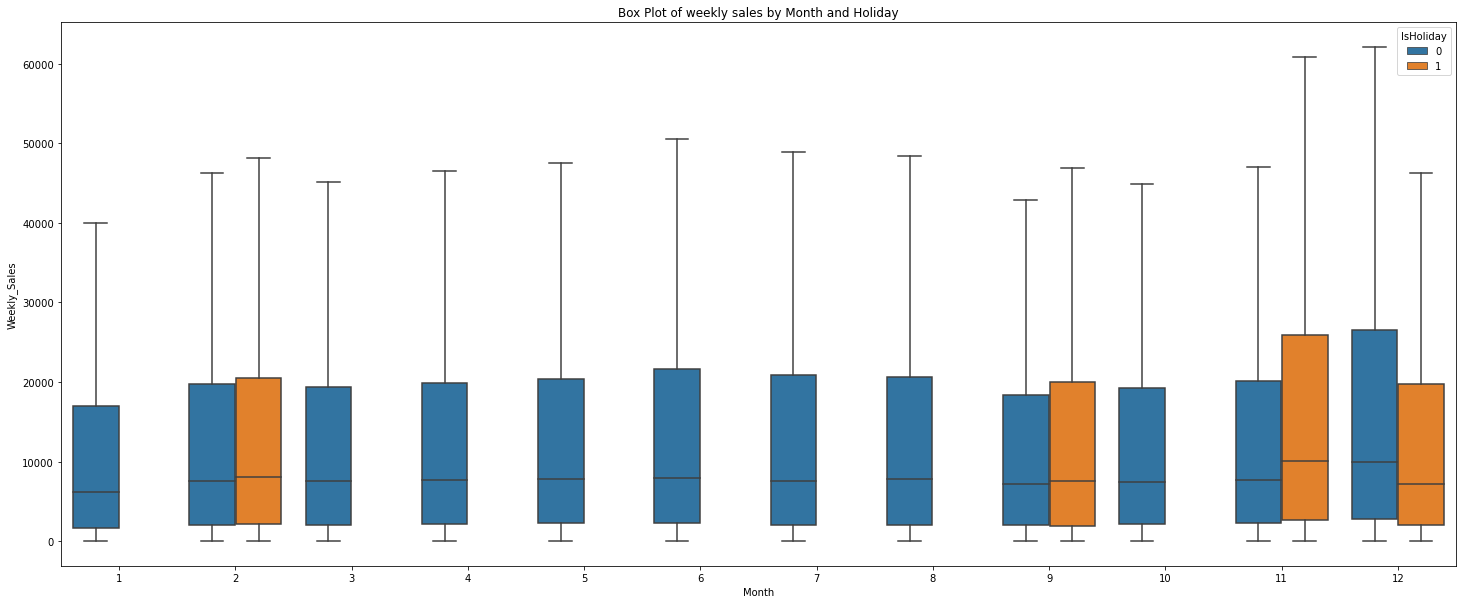

In [80]:
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Month', y='Weekly_Sales', data=train, showfliers=False, hue="IsHoliday")
plt.title("Box Plot of weekly sales by Month and Holiday")
plt.show()

- Month wise Weekly Sales visualization

In [81]:
train['Is_month_end'] = np.where(train.Day > 22, 1, 0)
train['Is_month_start'] = np.where(train.Day<7,1,0)
train['Is_month_end'] = train['Is_month_end'].astype('bool')
train['Is_month_start'] = train['Is_month_start'].astype('bool')

In [82]:
#This function is creating eta square test
def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        if numerator == 0:
            eta = 0.0
        else:
            eta = numerator/denominator
        return eta



In [83]:
print("Correlation of Is_month_end feature with weekly_sales")
print(correlation_ratio(train['Is_month_end'],train['Weekly_Sales']))
print(50*'*')
print("Correlation of Is_month_start feature with weekly_sales")
print(correlation_ratio(train['Is_month_start'],train['Weekly_Sales']))
print(50*'*')

Correlation of Is_month_end feature with weekly_sales
5.216972947042902e-06
**************************************************
Correlation of Is_month_start feature with weekly_sales
1.9811509998094588e-05
**************************************************


- Very less correlation between weekly_sales and These two features

In [84]:
sales_month_end = train['Weekly_Sales'][train['Is_month_end']==1]
sales_not_month_end = train['Weekly_Sales'][train['Is_month_end']==0]
print("Mean of the sales in month end week: ", np.mean(sales_month_end))
print("Standard devition of the sales in month end week: ", np.std(sales_month_end))
print("Max sales in month end week: ", np.max(sales_month_end))
print("Mean of the sales other than month end week: ", np.mean(sales_not_month_end))
print("Standard devition of the sales other than month end week: ", np.std(sales_not_month_end))
print("Max sales other than month end week: ", np.max(sales_not_month_end))
print("*"*100)


Mean of the sales in month end week:  16113.663857381722
Standard devition of the sales in month end week:  23620.549954023478
Max sales in month end week:  693099.36
Mean of the sales other than month end week:  15997.990039401433
Standard devition of the sales other than month end week:  22372.61997620224
Max sales other than month end week:  293966.05
****************************************************************************************************


- Looking at these data  it can be said that is_month_end have very less value to provide as it's max is very high compared to normal week that's why it's mean is high.


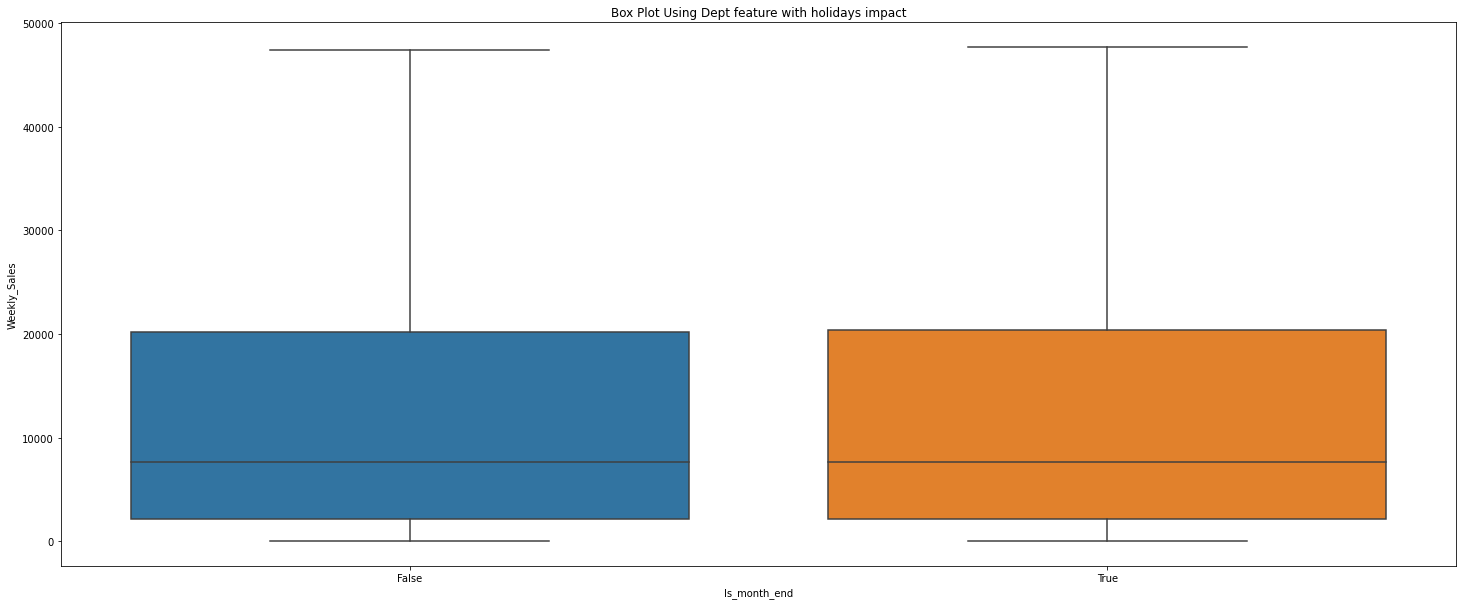

In [85]:
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Is_month_end', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using Dept feature with holidays impact")
plt.show()


- Month end have no impact on sales.So this feature is not useful.

In [86]:
sales_month_start = train['Weekly_Sales'][train['Is_month_start']==1]
sales_not_month_start = train['Weekly_Sales'][train['Is_month_start']==0]
print("Mean of the sales in month start week: ", np.mean(sales_month_start))
print("Standard devition of the sales in month start week: ", np.std(sales_month_start))
print("Max sales in month start week: ", np.max(sales_month_start))
print("Mean of the sales other than month start week: ", np.mean(sales_not_month_start))
print("Standard devition of the sales other than month start week: ", np.std(sales_not_month_start))
print("Max sales other than month start week: ", np.max(sales_not_month_start))
print("*"*100)

Mean of the sales in month start week:  16230.86551940547
Standard devition of the sales in month start week:  22686.472378730534
Max sales in month start week:  293966.05
Mean of the sales other than month start week:  15979.294986687777
Standard devition of the sales other than month start week:  22738.86727560598
Max sales other than month start week:  693099.36
****************************************************************************************************


- It has more value than month end feature as mean is high irresprective of max value is less than normal week but still not significant change is there.


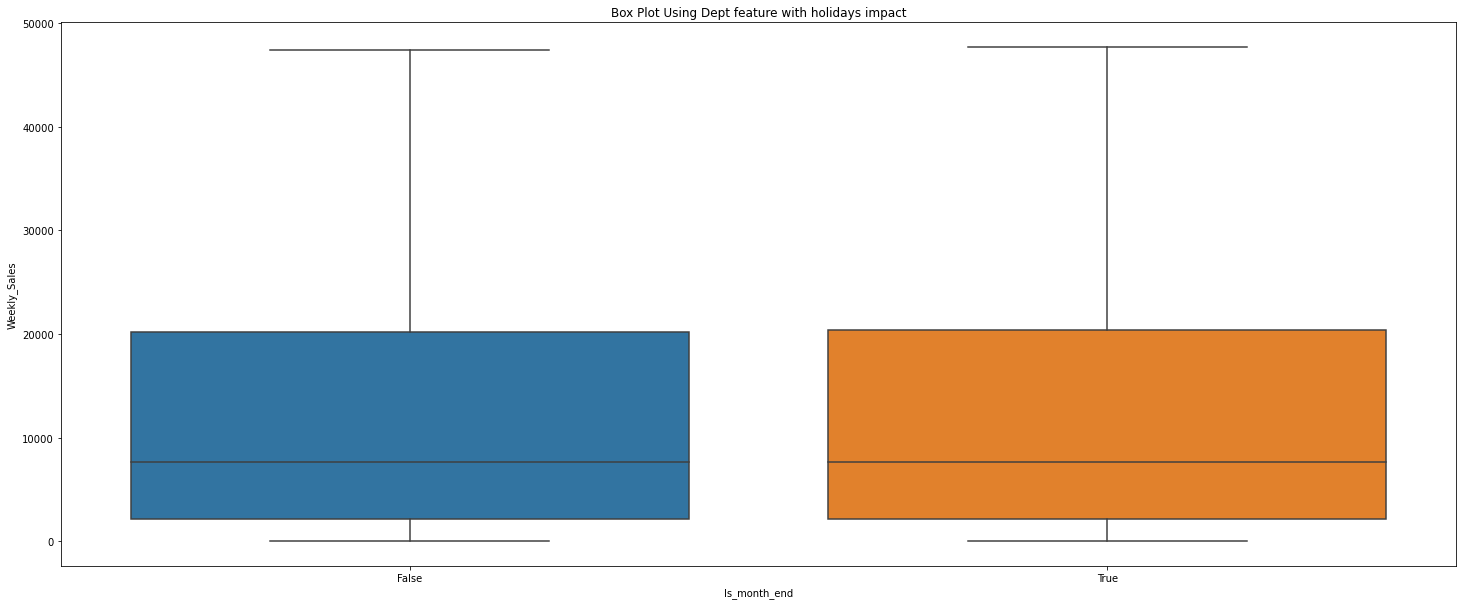

In [87]:
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Is_month_end', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using Dept feature with holidays impact")
plt.show()

- This feature is also not useful

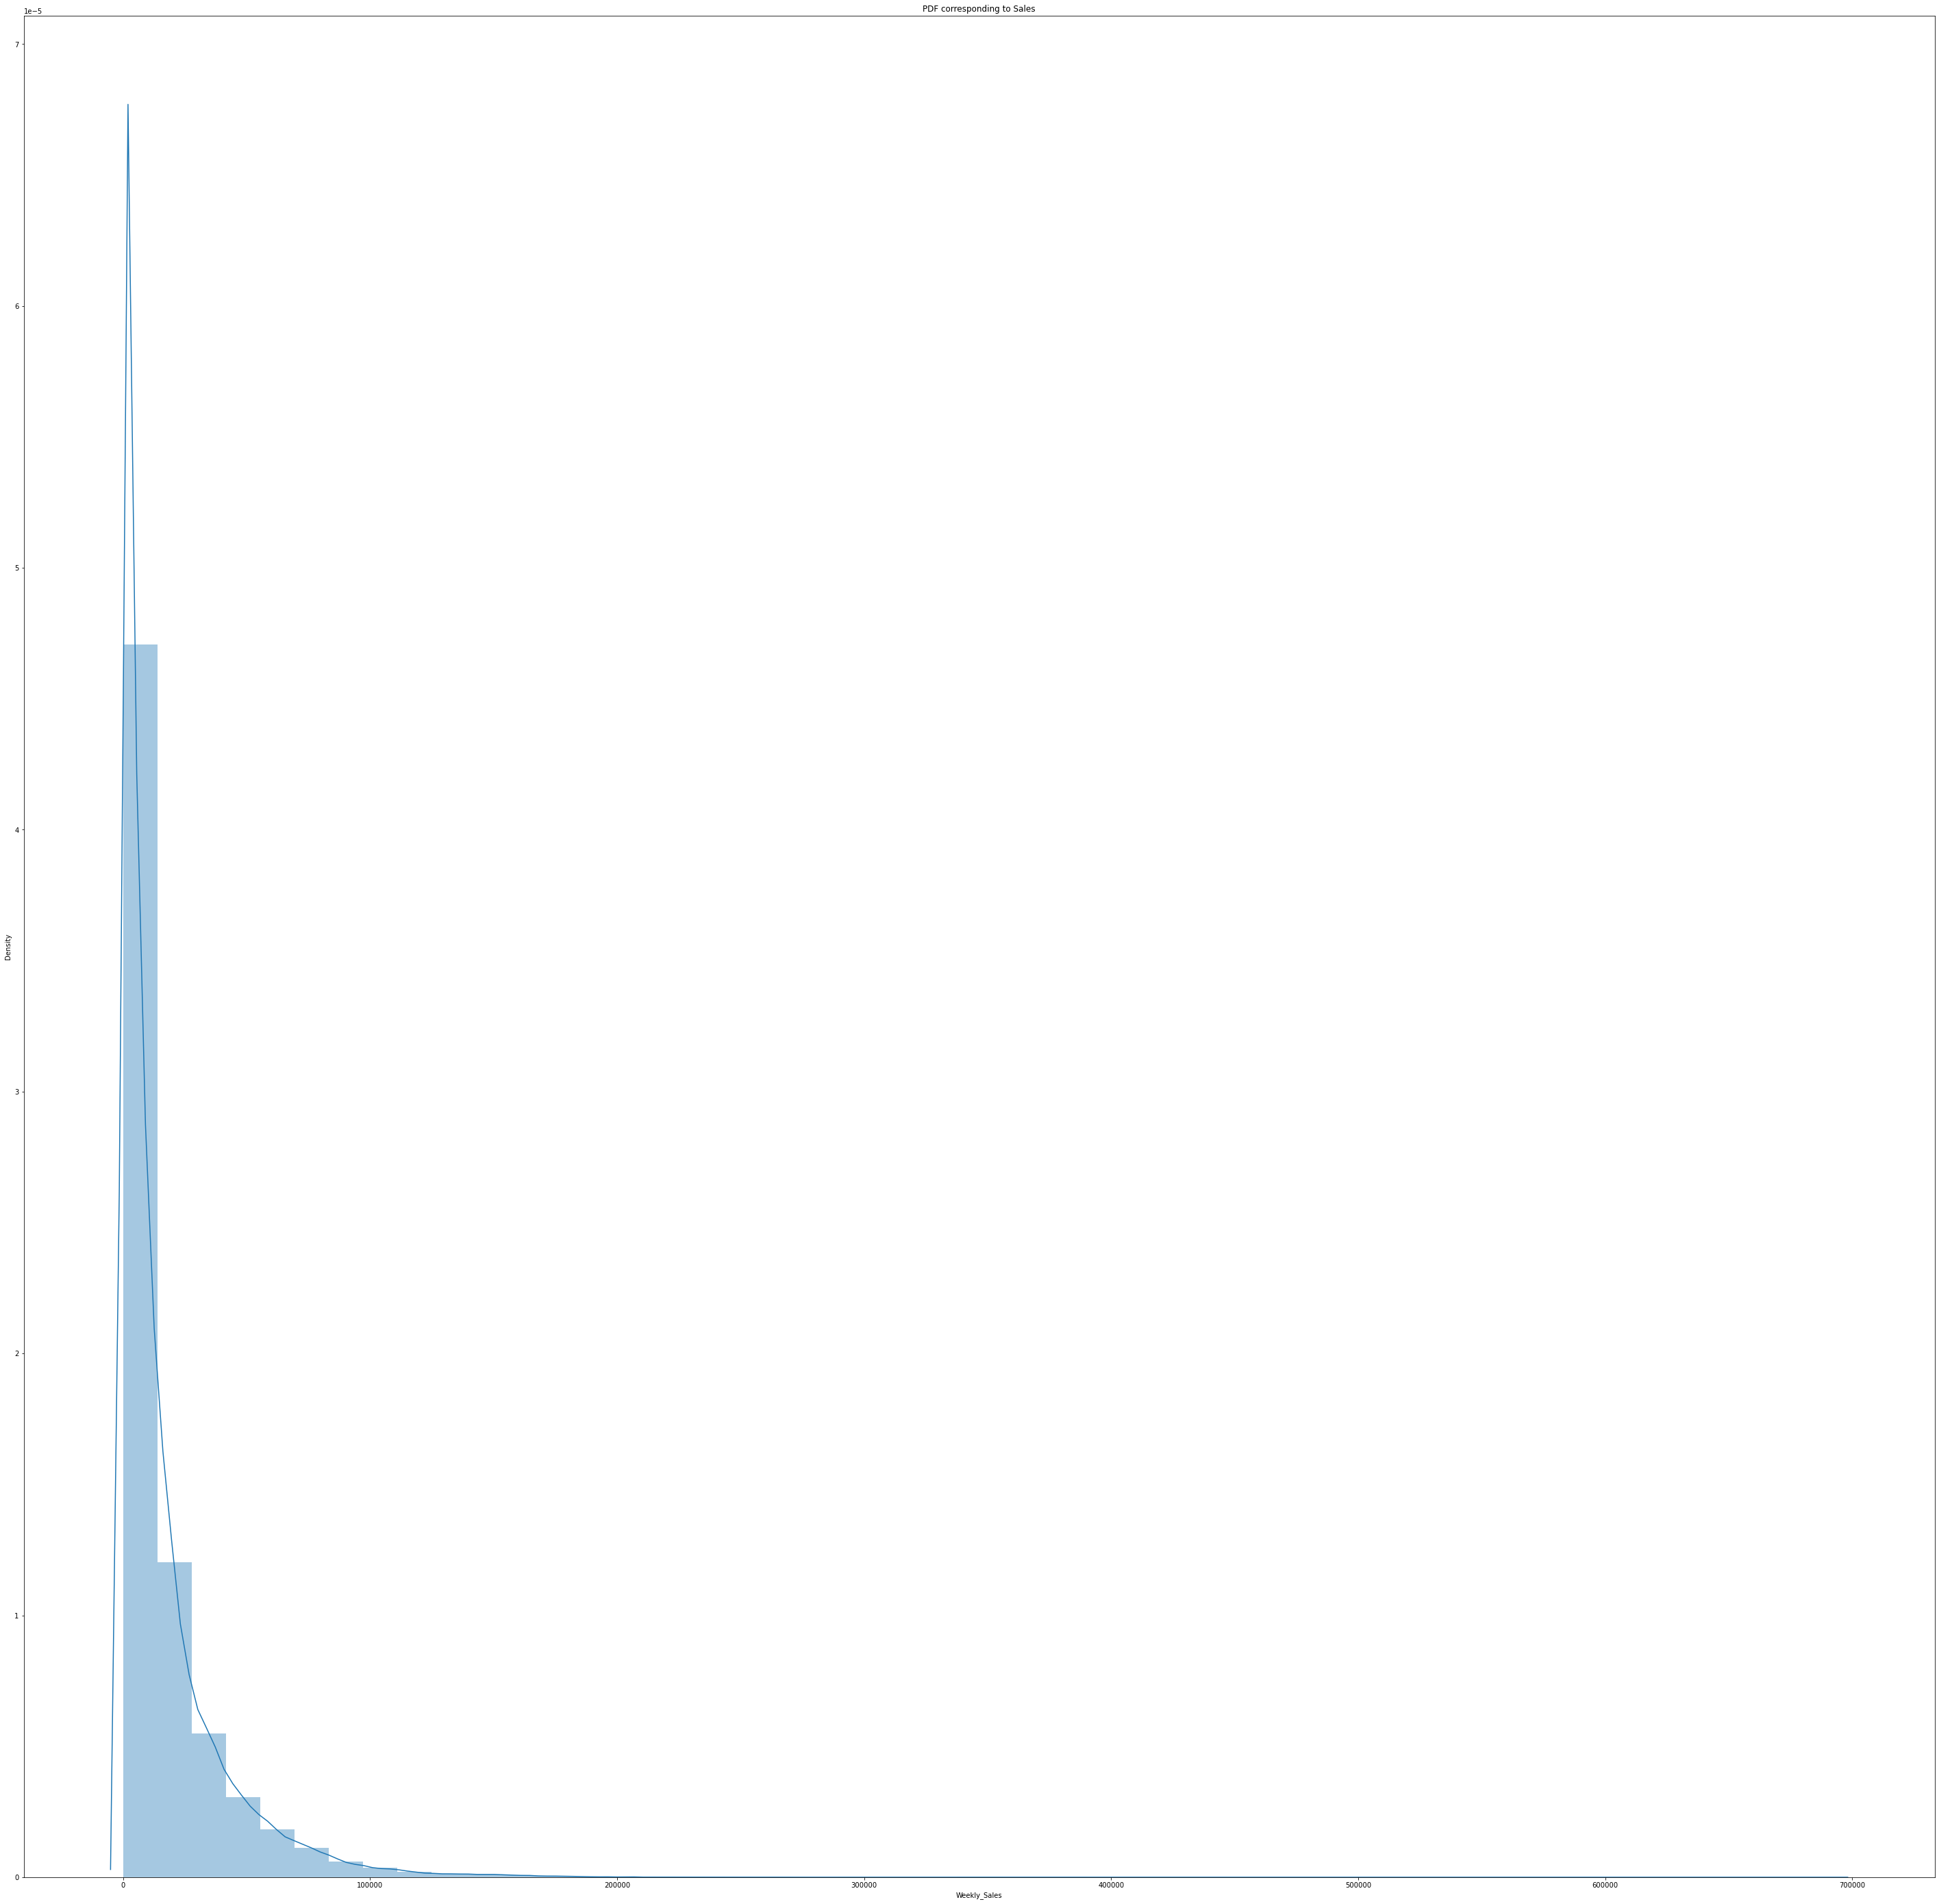

In [88]:
fig, ax = plt.subplots(figsize=(50, 50))
sns.distplot(train['Weekly_Sales'])
plt.title("PDF corresponding to Sales")
plt.show()

- Most of the week have sales between 0 to 30000.


In [89]:
#sns.pairplot(train,vars=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])


<function matplotlib.pyplot.show(close=None, block=None)>

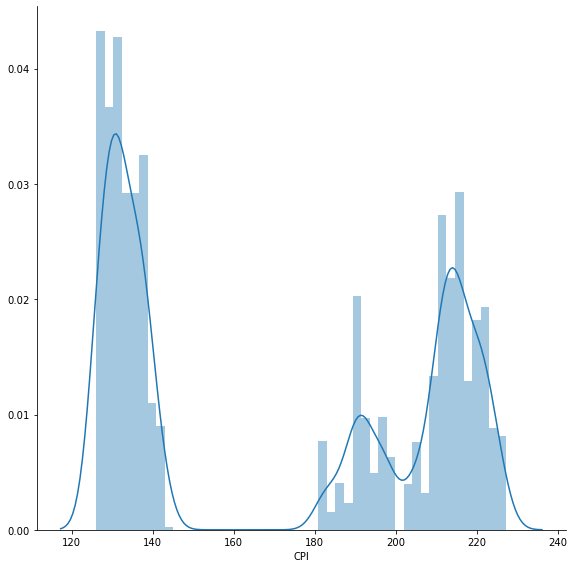

In [90]:
sns.FacetGrid(train,size = 8).map(sns.distplot,"CPI").add_legend();
plt.show

- Between 150 to 170  value of CPI there is no datapoint.


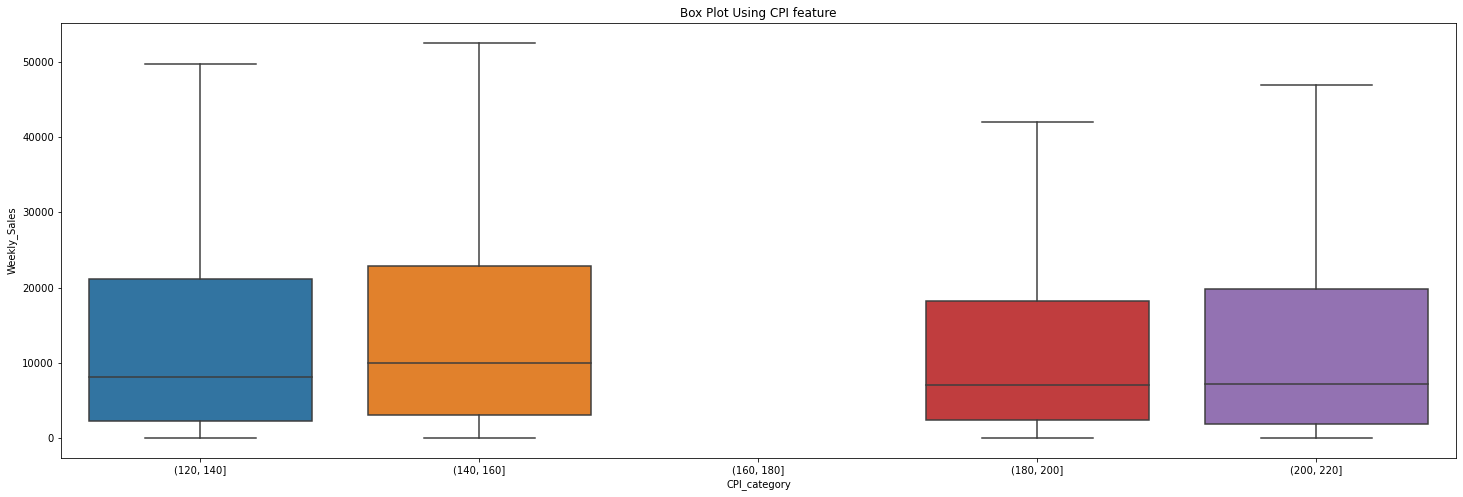

In [91]:
train['CPI_category'] = pd.cut(train['CPI'],bins=[120,140,160,180,200,220])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='CPI_category', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using CPI feature")
plt.show()


- CPI between 160 to 180 as no datapoints so no sales. apart from that not much difference while change in the CPI during that period.

<function matplotlib.pyplot.show(close=None, block=None)>

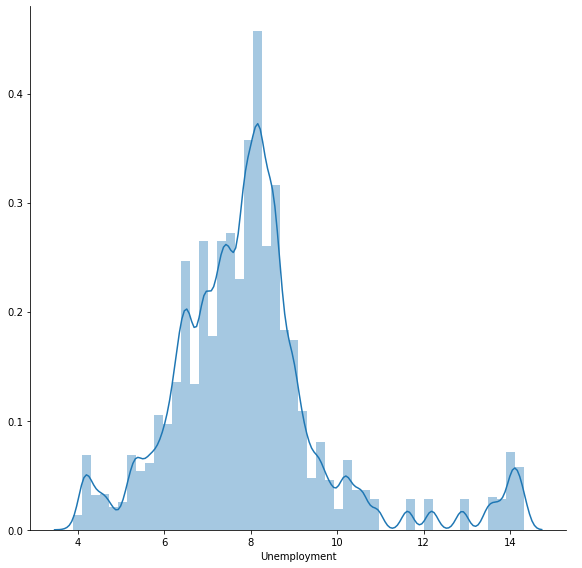

In [92]:
sns.FacetGrid(train,size=8).map(sns.distplot,"Unemployment").add_legend();
plt.show

- Most of the point lies when umployement rate is 8.

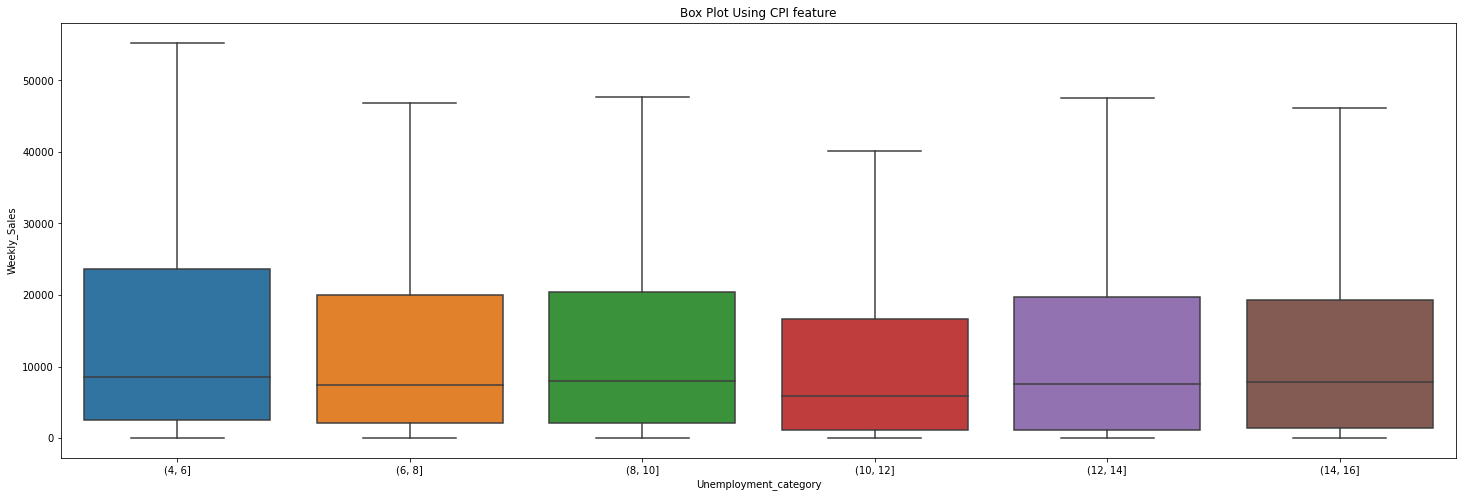

In [93]:
train['Unemployment_category'] = pd.cut(train['Unemployment'],bins=[4,6,8,10,12,14,16])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Unemployment_category', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using CPI feature")
plt.show()

- Mean value of all box plot range are comparartively equal so it is not useful in determining sales of store.so it can be removed.

<function matplotlib.pyplot.show(close=None, block=None)>

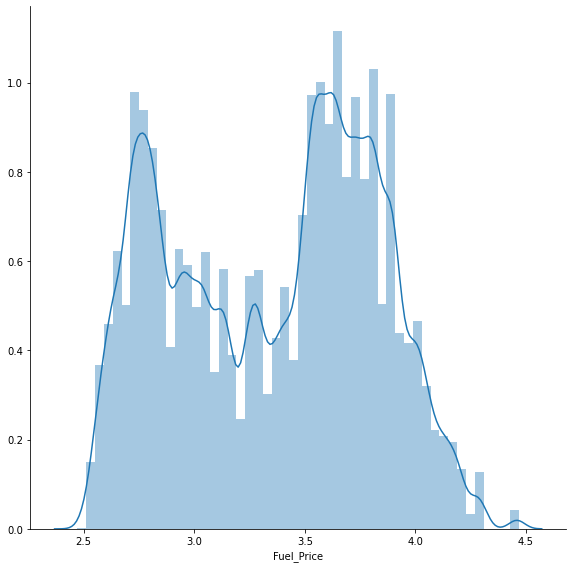

In [94]:
sns.FacetGrid(train,size=8).map(sns.distplot,"Fuel_Price").add_legend();
plt.show

- Here it looks no of datapoints are higher when fuel rate was between 3.5 to 4.0 and 2.5-3.0.

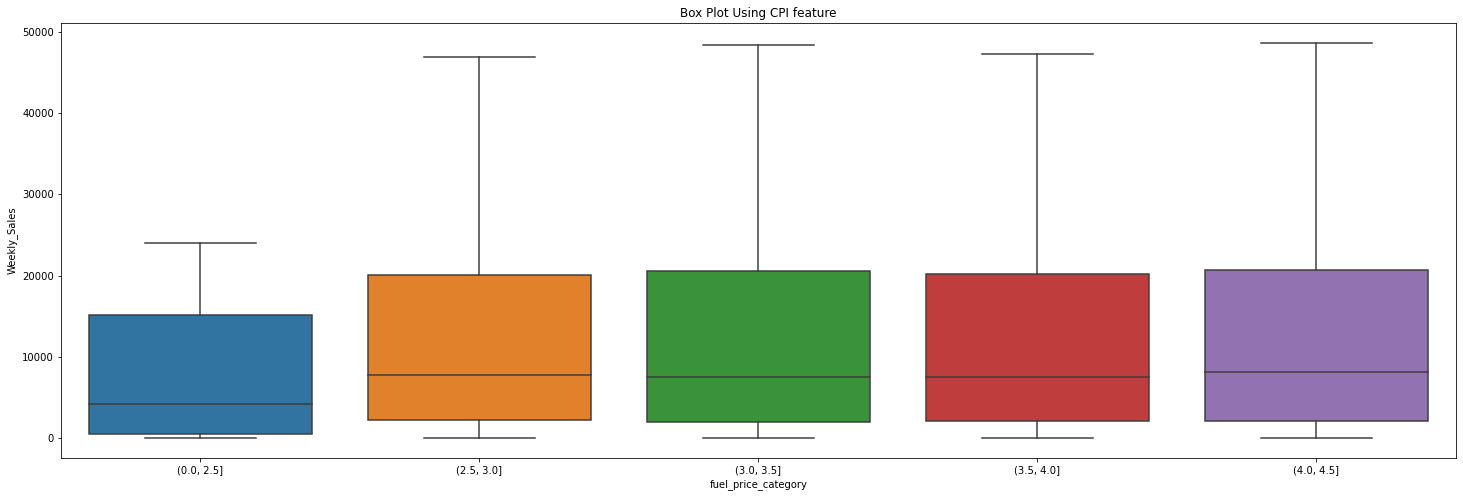

In [95]:
train['fuel_price_category'] = pd.cut(train['Fuel_Price'],bins=[0,2.5,3,3.5,4,4.5])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='fuel_price_category', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using CPI feature")
plt.show()


- Fuel price has very less impact on sales as there is no change in sales as price increasing.So this feature can also be removed.

<function matplotlib.pyplot.show(close=None, block=None)>

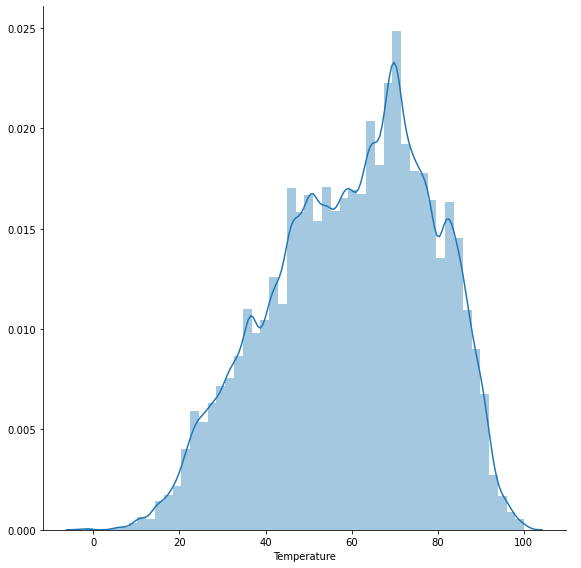

In [96]:
sns.FacetGrid(train,size=8).map(sns.distplot,"Temperature").add_legend();
plt.show

- Through here it can be seen that most of the data point lies in 60-80 F temperatures assuming most of the sales also happens here.


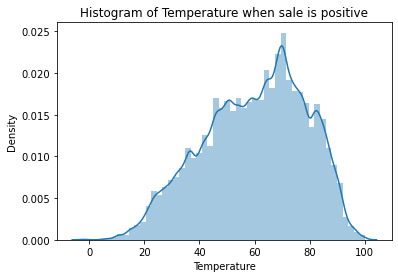

In [97]:

positive_temperature = train[train['Weekly_Sales']>0]['Temperature']
sns.distplot(positive_temperature)
plt.title("Histogram of Temperature when sale is positive")
plt.show()

- This graph is also telling the same thing that 60-80 F temperature have more number of times of sale.


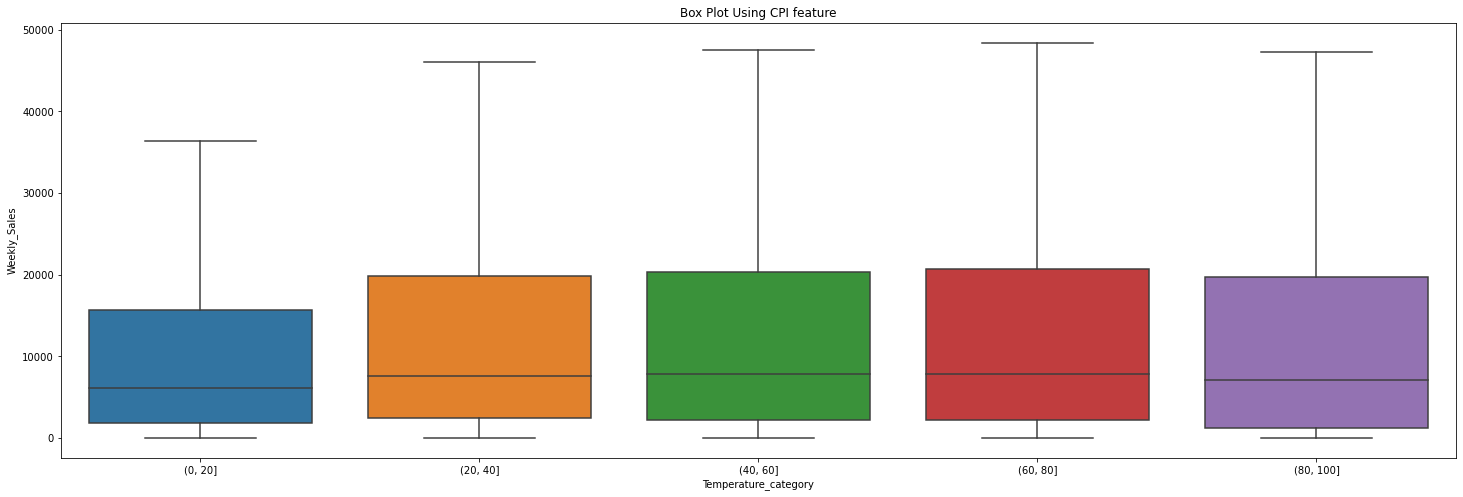

In [98]:
train['Temperature_category'] = pd.cut(train['Temperature'],bins=[0,20,40,60,80,100])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Temperature_category', y='Weekly_Sales', data=train, showfliers=False)
plt.title("Box Plot Using CPI feature")
plt.show()

- Here it seems 60-80 temperature have almost same sale as in other category of temperature.So this feature can also be removed.

In [104]:
g = train.groupby(["Month","Store"])
monthly_averages = g.aggregate({"Weekly_Sales":np.mean})
store_value=monthly_averages.loc[monthly_averages.groupby('Month')['Weekly_Sales'].idxmax()]
print("Stores which have highest value during that  Month: ")
store_value

Stores which have highest value during that  Month: 


Weekly_Sales
Month Store              
1     4      26792.255620
2     20     30499.281528
3     14     28550.643923
4     14     29557.689553
5     14     29439.083763
6     20     30032.278419
7     20     28916.581834
8     4      29082.862586
9     20     28006.353978
10    4      28723.672097
11    20     33133.195079
12    20     36963.445276

-  It can be seen that 3 stores are more prominent than all others. Store 20 has highest Sale during Thanksgiving and Christmas which were more impactful than Labour's Day and Super Bowl.

- As we can see that thanksgiving and christmas are more impactful than other two.so every holiday has its own level of impact .So we can make a category of holidays as feature.


## Creating dateset for training purpopse

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 420284
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  420285 non-null  int64         
 1   Dept                   420285 non-null  int64         
 2   Date                   420285 non-null  datetime64[ns]
 3   Weekly_Sales           420285 non-null  float64       
 4   IsHoliday              420285 non-null  int64         
 5   Year                   420285 non-null  int64         
 6   Month                  420285 non-null  int64         
 7   Week                   420285 non-null  int64         
 8   Day                    420285 non-null  int64         
 9   n_days                 420285 non-null  int64         
 10  Type                   420285 non-null  object        
 11  Size                   420285 non-null  int64         
 12  Temperature            420285 non-null  floa

In [106]:
storetype_values = {'A':3, 'B':2, 'C':1}
train['Type_Numeric'] = train.Type.map(storetype_values)
test['Type_Numeric'] = test.Type.map(storetype_values)

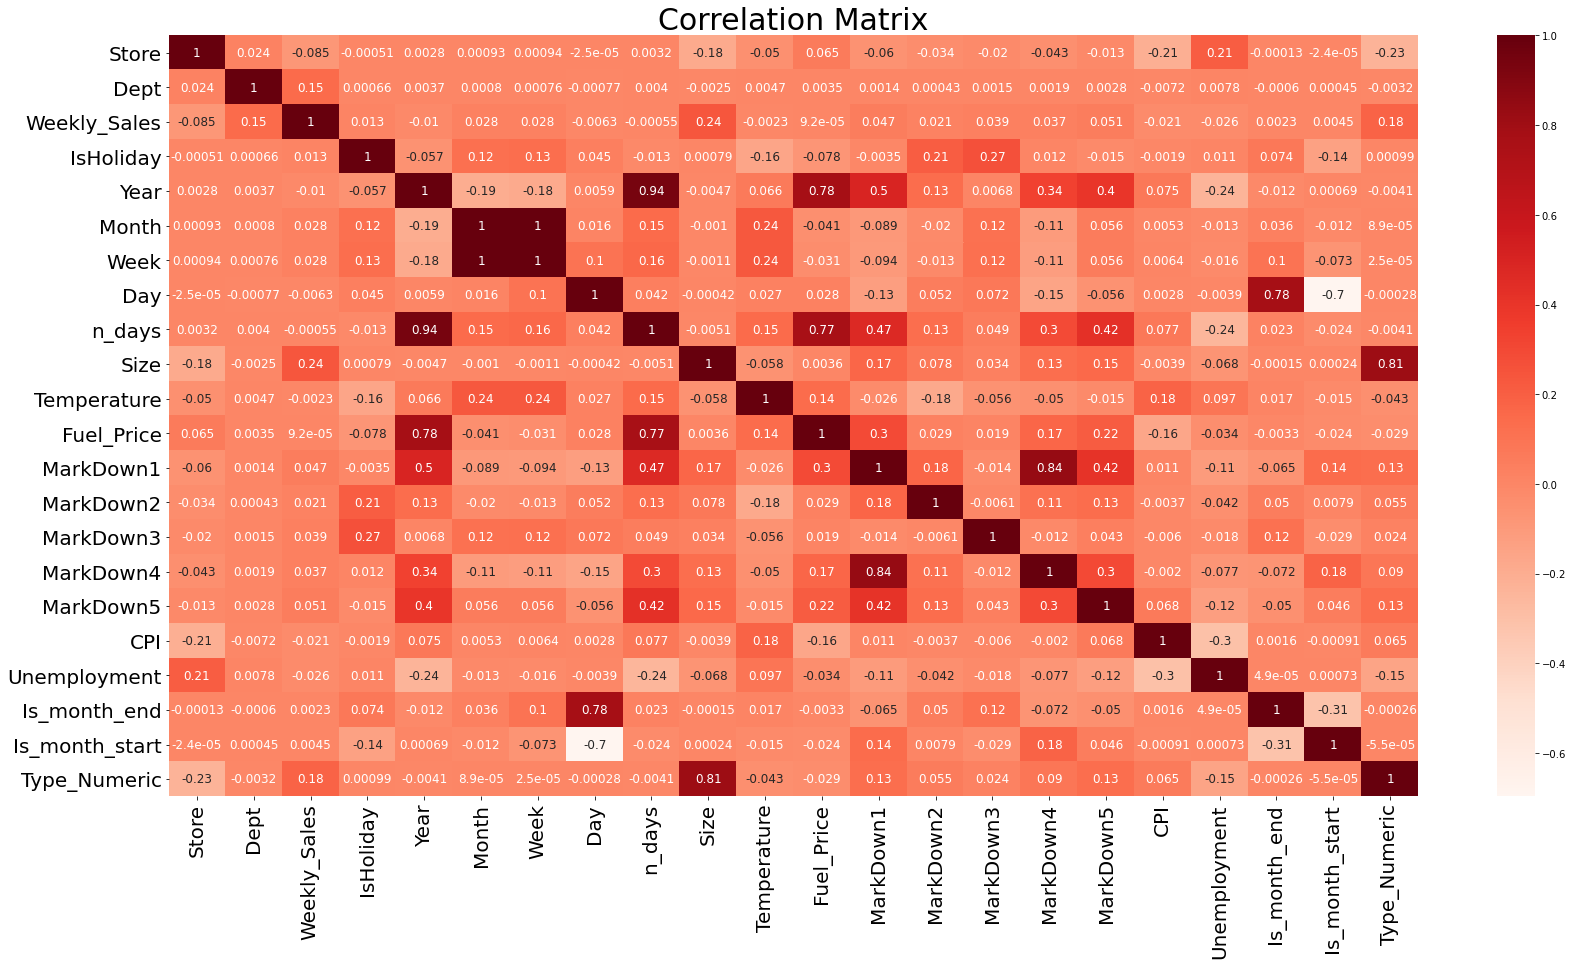

In [107]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

sns.heatmap(train.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);



- Department, Store size and Type have moderate correlation with the weekly sales
- Markdown1-5 have very weak correlation with the weekly sales, so we will leave these columns out
- Temperature. Fuel price, CPI and Unemployment are very weakly coorelated with the weekly sales, so these columns will also be dropped out
- IsHoliday will be considered for the further analysis as the sales in the holiday weeks are higher than in the non-holiday weeks
- We will also leave out Month and Day as this information is already contained in the WeekOfYear

## Data preparation for Model Training

Following steps will be performed for preparing the data for the subsequent model training

- Based on the Exploratory Data Analysis and Coorelation study, the columns with weak relationship with the target column will be dropped
- Input and Target dataframes will be created
- Inputs will be scaled in the 0 to 1 range
- Training and Validation datasets will be created
- A function will be defined based on which the models performance will be measured

In [108]:
train = train.drop(['Date', 'Temperature','Fuel_Price', 'Type','Temperature_category','fuel_price_category','Unemployment_category','CPI_category','Is_month_start','Is_month_end','n_days', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)

test = test.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'n_days','Month','Day', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'], axis=1)

In [109]:
# Identify input and target columns

input_cols = train.columns.to_list()
input_cols.remove('Weekly_Sales')
target_col = 'Weekly_Sales'

inputs_df = train[input_cols].copy()
targets = train[target_col].copy()

In [110]:
# Scale the values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train[input_cols])

inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
test[input_cols] = scaler.transform(test[input_cols])

In [111]:
# Create training and validation sets
#X_train = train_inputs
#x test = val_inputs
#y train = train_targets
#y_test = val_targets

from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df, targets, test_size=0.3, random_state=42)

In [112]:
# Define the function to evaluate the models

def WMAE(df, targets, predictions):
    weights = df.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(targets-predictions))/(np.sum(weights)), 2)


# Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression().fit(train_inputs, train_targets)

# Generate predictions on training data
train_preds = model.predict(train_inputs)

# Compute WMAE on traing data
train_wmae = WMAE(train_inputs, train_targets, train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))

# Generate predictions on validation data
val_preds = model.predict(val_inputs)

# Compute WMAE on validation data
val_wmae = WMAE(val_inputs, val_targets, val_preds)
print('The WMAE loss for the validation set is  {}.'.format(val_wmae))

The WMAE loss for the training set is  14813.4.
The WMAE loss for the validation set is  14831.1.


In [114]:
model.score(val_inputs,val_targets)

0.08628197918174374

In [115]:
model.score(train_inputs,train_targets)

0.08567218247961339

# Ridge Regression

In [116]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model
model_ridge = Ridge().fit(train_inputs, train_targets)

# Generate predictions on training data
train_preds = model_ridge.predict(train_inputs)

# Compute WMAE on traing data
#X_train = train_inputs
#x test = val_inputs
#y train = train_targets
#y_test = val_targets

train_wmae = WMAE(train_inputs, train_targets, train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))

# Generate predictions on validation data
val_preds = model_ridge.predict(val_inputs)

# Compute WMAE on validation data
val_wmae = WMAE(val_inputs, val_targets, val_preds)
print('The WMAE loss for the validation set is  {}.'.format(val_wmae))

The WMAE loss for the training set is  14813.37.
The WMAE loss for the validation set is  14831.07.


In [117]:
model_ridge.score(val_inputs,val_targets)


0.08628197211109445

In [118]:
model_ridge.score(train_inputs,train_targets)

0.08567218213373151

# Decision Tree

In [119]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(train_inputs, train_targets)

tree_train_preds = tree.predict(train_inputs)

# Compute WMAE on traing data
tree_train_wmae = WMAE(train_inputs, train_targets, tree_train_preds)
print('The WMAE loss for the training set is  {}.'.format(tree_train_wmae))


# Compute WMAE on validation data
tree_val_preds = tree.predict(val_inputs)
tree_val_wmae = WMAE(val_inputs, val_targets, tree_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(tree_val_wmae))


The WMAE loss for the training set is  0.0.
The WMAE loss for the validation set is  1907.13.


In [120]:
tree.score(train_inputs,train_targets)

1.0

In [121]:
tree.score(val_inputs,val_targets)

0.9615887538427229

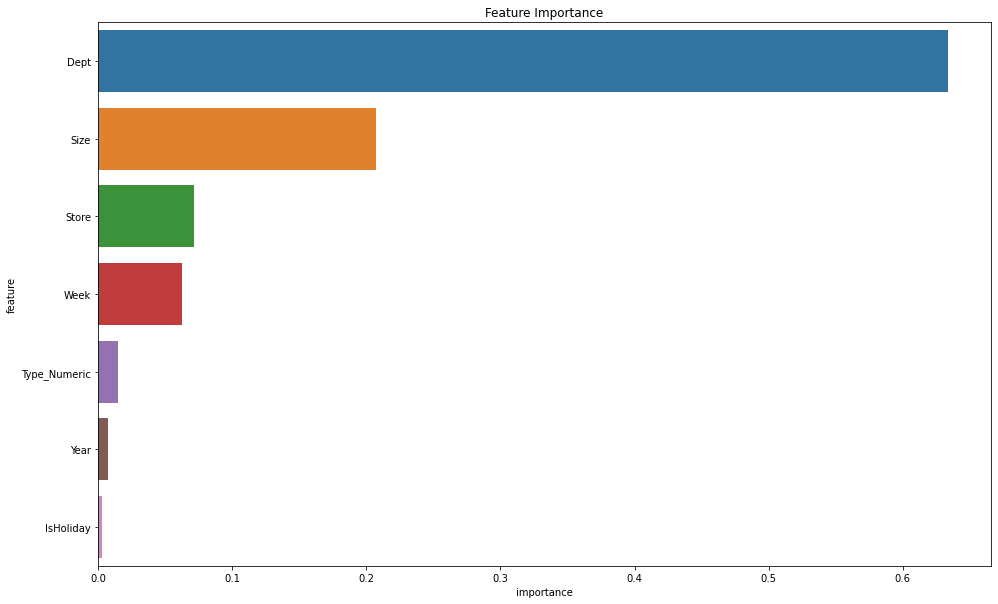

In [122]:

importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

- Department, Store Size and Store Number have high model importances than the other parameters



In [123]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

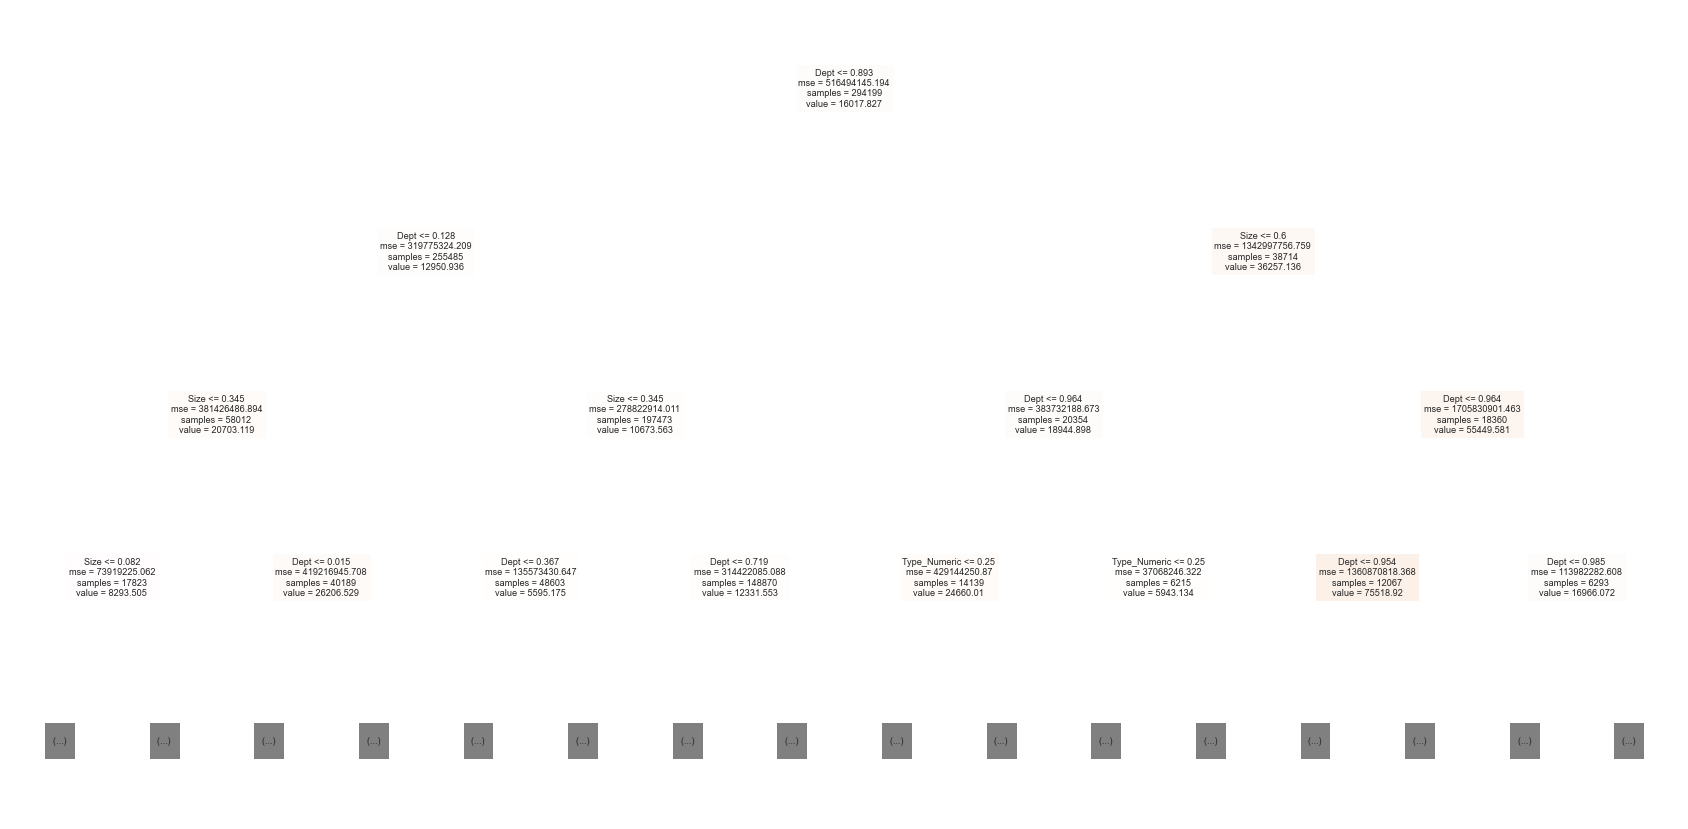

In [124]:
plt.figure(figsize=(30,15))
plot_tree(tree, feature_names=train_inputs.columns, max_depth=3, filled=True);

In [125]:
#X_train = train_inputs
#x test = val_inputs
#y train = train_targets
#y_test = val_targets
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(train_inputs,train_targets)
y_pred = dt.predict(val_inputs)

In [126]:
accuracy = dt.score(val_inputs,val_targets)
accuracy

0.9615023004620668

# Random Forest


In [127]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
rf1.fit(train_inputs, train_targets)

rf1_train_preds = rf1.predict(train_inputs)

# Compute WMAE on traing data
rf1_train_wmae = WMAE(train_inputs, train_targets, rf1_train_preds)
print('The WMAE loss for the training set is  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(val_inputs)

# Compute WMAE on validation data
rf1_val_wmae = WMAE(val_inputs, val_targets, rf1_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(rf1_val_wmae))

The WMAE loss for the training set is  571.82.
The WMAE loss for the validation set is  1576.55.


In [128]:
rf1.score(val_inputs,val_targets)

0.9758411699082754

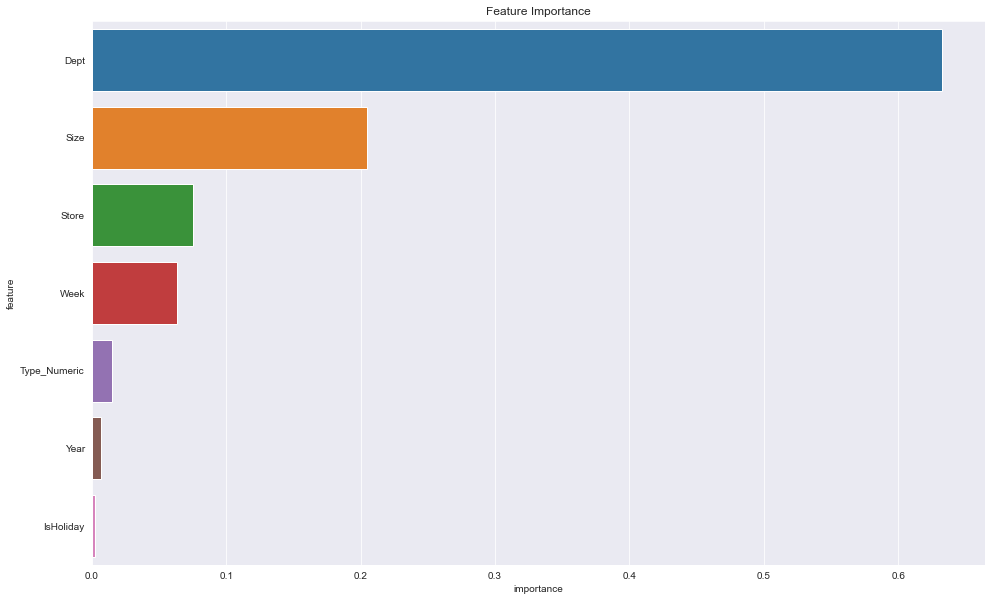

In [129]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf1.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

- For the Random Forest also, the Department, Store Size and Store Number have higher model importances than the other parameters

## Tuning of Random Forest Parameters


- Let's define two functions which assist the tuning of hyper parameters.

- 'test_params' takes the parameters of Random Forest and train the model. After that it make predictions of the training and validation and return weighted mean averaged error for the traing and validation data.

- 'test_param_and_plot' takes the parameter name and the range of values to be tested. For these values 'test_params' is called inside the funtion to train and evaluate the model. Finally the training and validation errors are plotted against the tested values.

In [130]:
def test_params(**params):  
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae

In [131]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = test_params(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

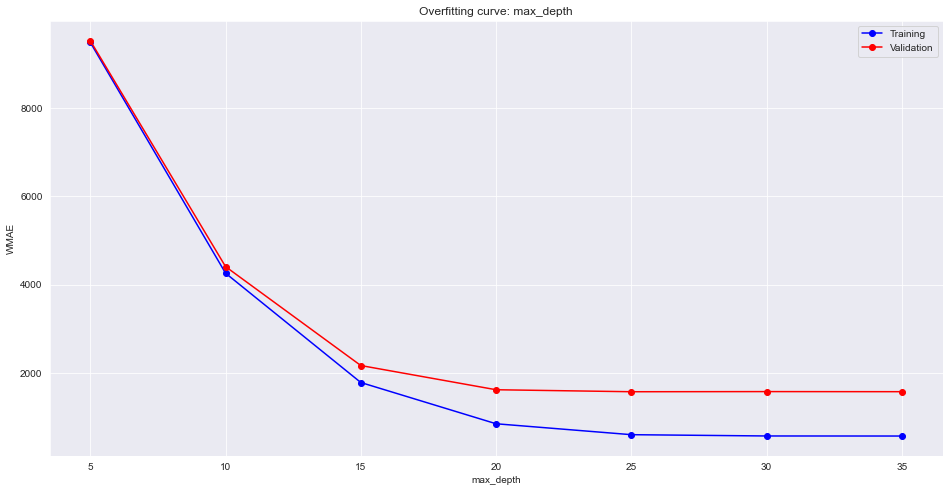

In [132]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])


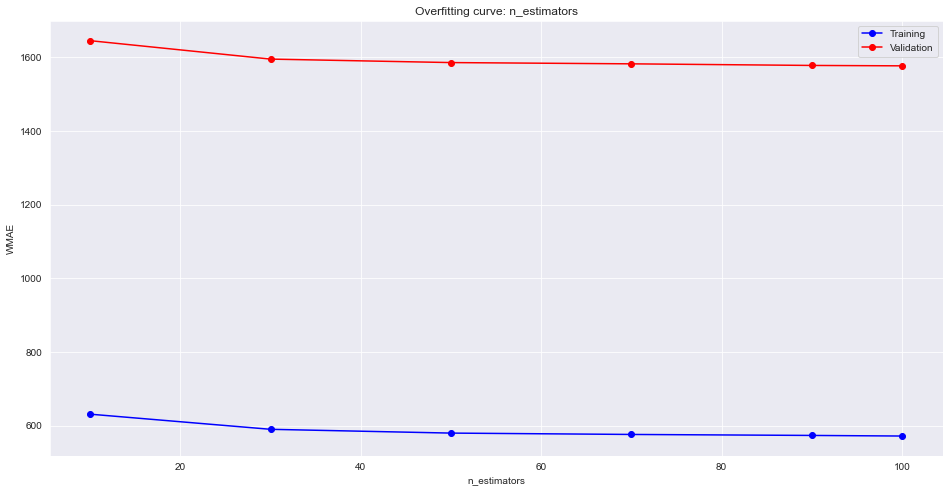

In [133]:
test_param_and_plot('n_estimators', [10, 30, 50, 70, 90, 100])


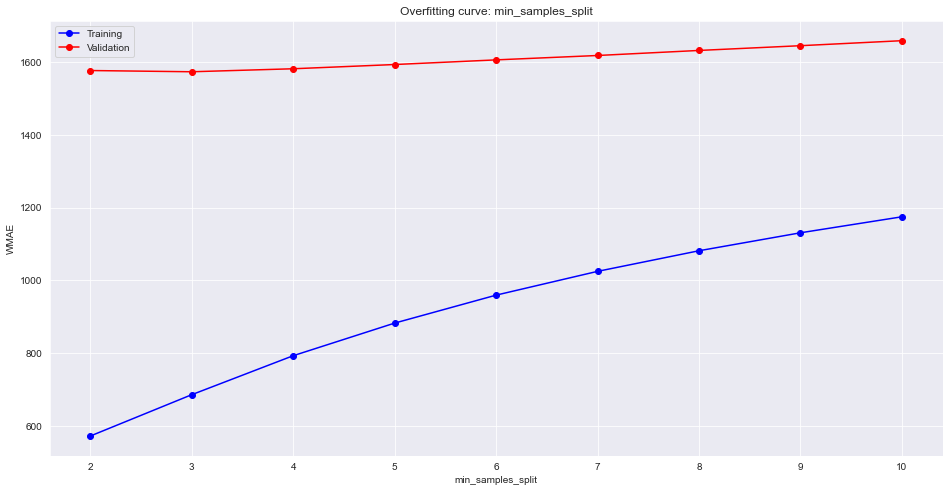

In [134]:
test_param_and_plot('min_samples_split', [2, 3, 4, 5, 6, 7, 8, 9, 10])


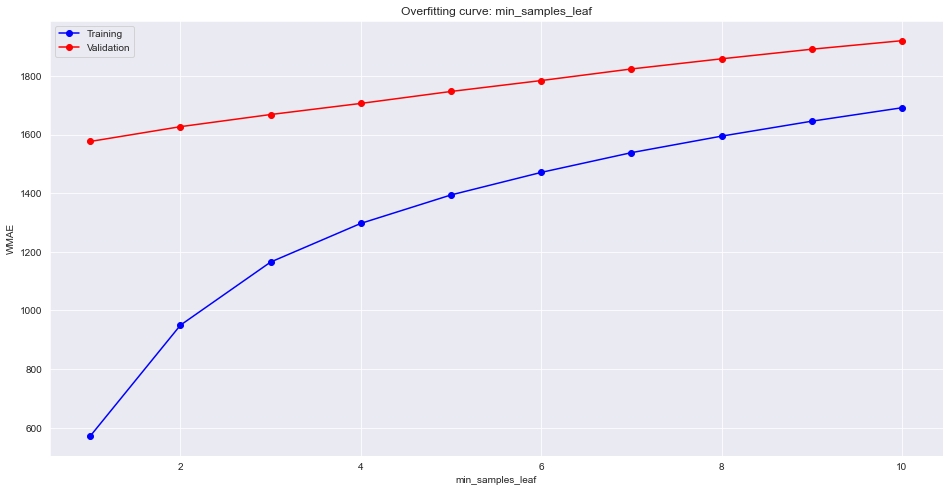

In [135]:
test_param_and_plot('min_samples_leaf', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


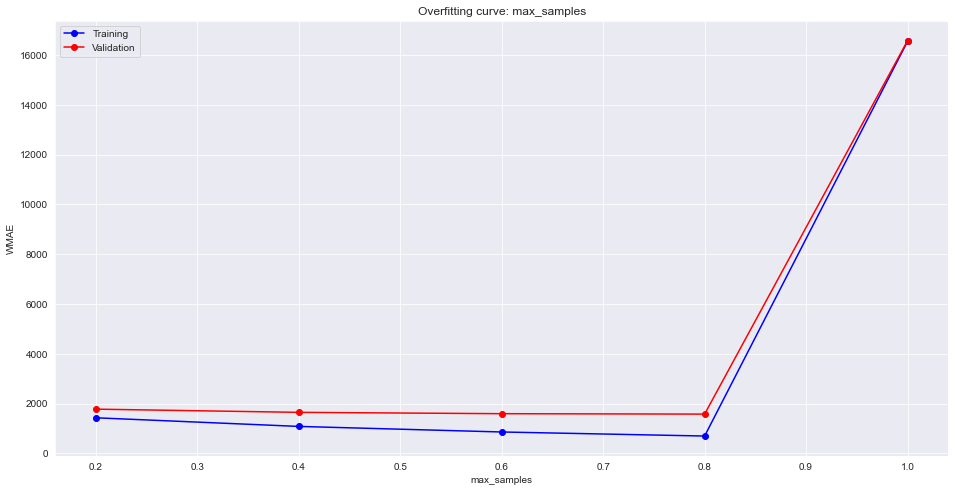

In [136]:
test_param_and_plot('max_samples', [0.2, 0.4, 0.6, 0.8, 1])


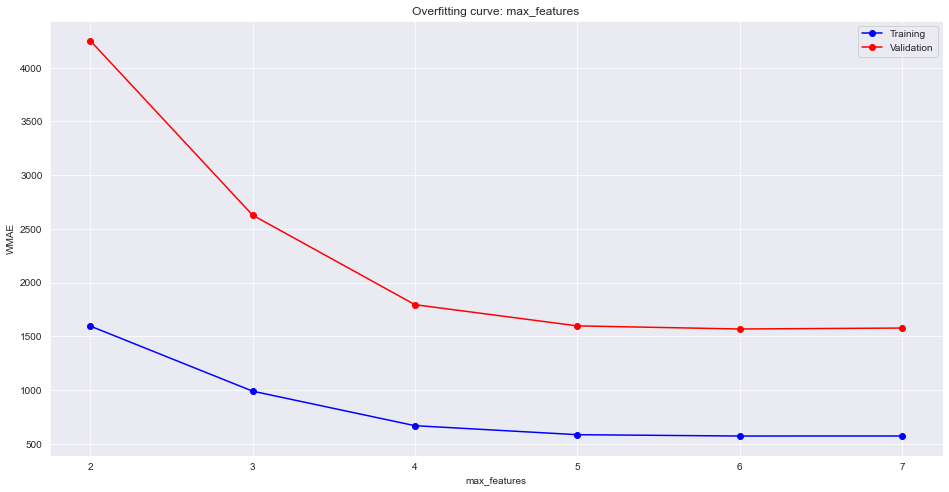

In [137]:
test_param_and_plot('max_features', [2, 3, 4, 5, 6, 7])


From the above testing of parameters, the follwoing values of parameters were found to be the best which minimizes the validation error.

max_depth: 30

n_estimators: 100

min_samples_split: 2

min_samples_leaf: 1

max_samples: 0.8

max_features: 7

These parameters were tuned one at a time but they are somehow interrelated and effect eachother but from this I got a rough idea where the optimal values lie. Further after simultaneously varying the parameters by making some educated guesses, I found the following parameters which give better performance than the untuned base model

max_depth: 30

n_estimators: 130

min_samples_split: 2

min_samples_leaf: 1

max_samples: 0.9999

max_features: 6


In [138]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, max_depth=30, n_estimators=130, min_samples_split=2, min_samples_leaf=1, 
                            max_samples=0.99999, max_features=6,  random_state=42)

# Fit the model
rf1.fit(train_inputs, train_targets)

rf1_train_preds = rf1.predict(train_inputs)

# Compute WMAE on traing data
rf1_train_wmae = WMAE(train_inputs, train_targets, rf1_train_preds)
print('The WMAE loss for the training set is  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(val_inputs)

# Compute WMAE on validation data
rf1_val_wmae = WMAE(val_inputs, val_targets, rf1_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(rf1_val_wmae))

The WMAE loss for the training set is  569.56.
The WMAE loss for the validation set is  1566.76.


In [139]:
rf1.score(val_inputs,val_targets)

0.9769713566607163

## Gradient Boosting 

In [130]:
from xgboost import XGBRegressor

# Create the model
gbm = XGBRegressor(random_state=42, n_jobs=-1)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('The WMAE loss for the training set is  {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on validation data
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(gbm_val_wmae))

The WMAE loss for the training set is  2995.61.
The WMAE loss for the validation set is  3111.83.


In [131]:
gbm.score(val_inputs,val_targets)

0.9445943307471225

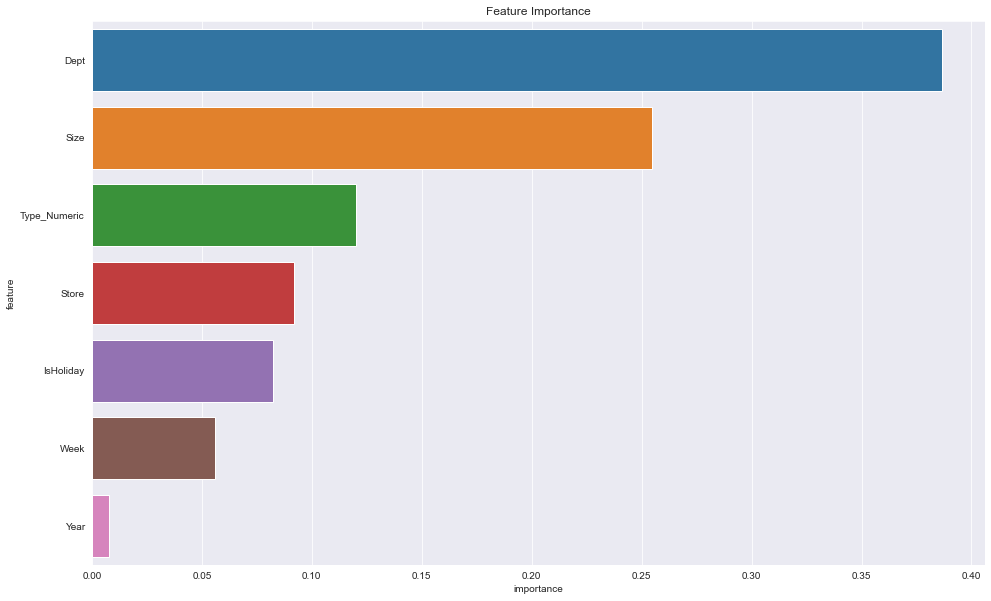

In [132]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': gbm.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

- For the Gradient Boosting Machine, the Department, Store Size and Store Type are the major contributing features

- This differs little bit from Decision Trees and Random Forests as in this case the Store Type has higher importance than the Store Number

## Tuning of Model Parameters

Let's define two functions like before which assist the tuning of hyper parameters.

'test_params_xgb' takes the parameters of Random Forest and train the model. After that it make predictions on the training and validation and return weighted mean averaged error for the traing and validation data.

'test_param_and_plot_xgb' takes the parameter name and the range of values to be tested. For these values 'test_params' is called inside the funtion to train and evaluate the model. Finally the training and validation errors are plotted against the tested values.

In [133]:
def test_params_xgb(**params):  
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae

In [134]:
def test_param_and_plot_xgb(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = test_params_xgb(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

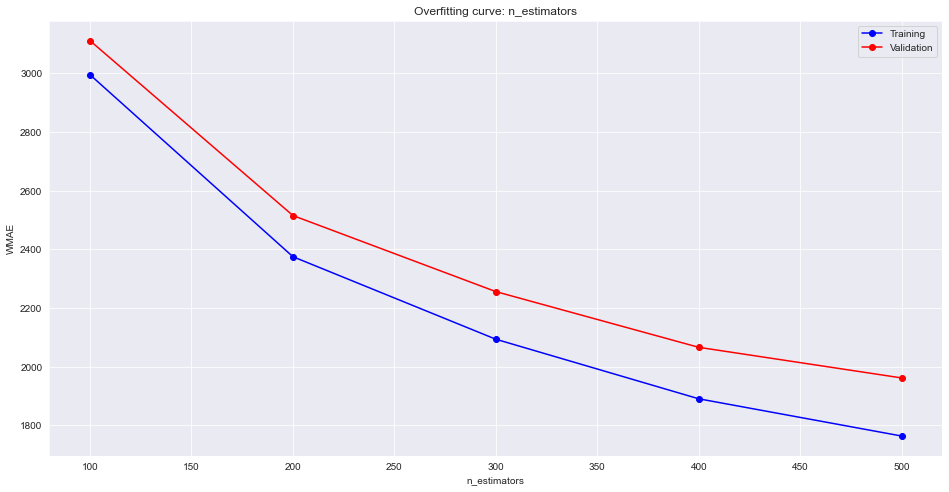

In [135]:
test_param_and_plot_xgb('n_estimators', [100, 200, 300, 400, 500])

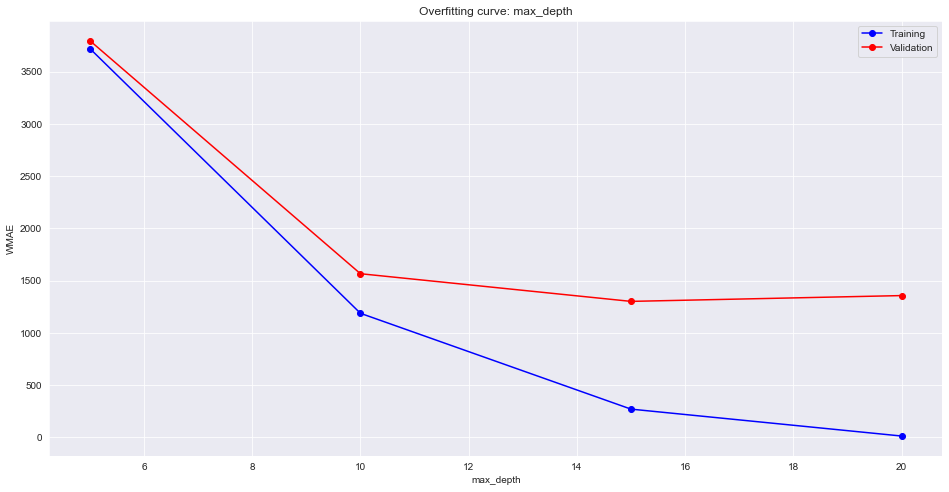

In [136]:
test_param_and_plot_xgb('max_depth', [5, 10, 15, 20])


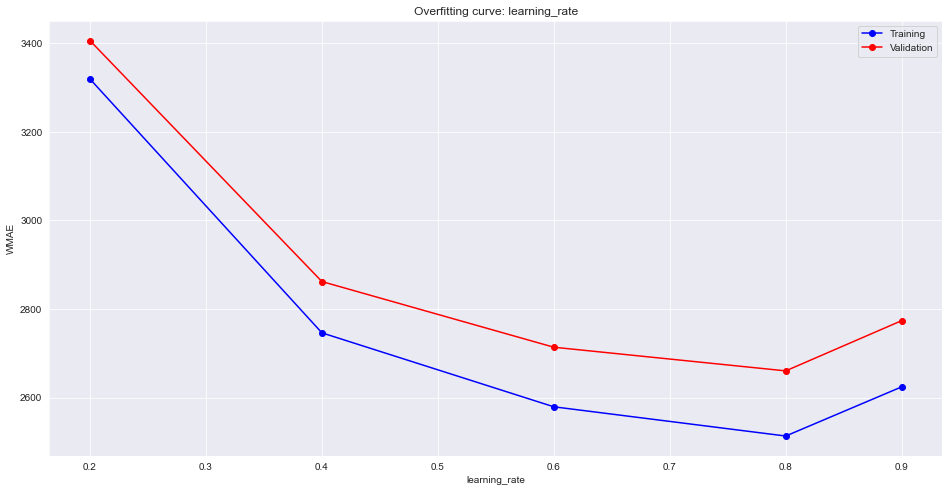

In [137]:
test_param_and_plot_xgb('learning_rate', [0.2, 0.4, 0.6, 0.8, 0.9])


From the above testing of parameters, the follwoing values of parameters were found to be the best which minimizes the validation error.

max_depth: 20

n_estimators: 500

learning_rate: 0.8

These parameters are varied one at a time but they both are inter related. These parameters are then varied simultaneouslyfurther fine tuning of the model by making some educated guesses and the best combination of values which minimizes the validation error are as follows:

max_depth: 15

n_estimators: 400

learning_rate: 0.35

In [138]:
from xgboost import XGBRegressor

# Create the model
gbm = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=400, max_depth=15, learning_rate=0.35)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('The WMAE loss for the training set is  {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on test data
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(gbm_val_wmae))

The WMAE loss for the training set is  15.14.
The WMAE loss for the validation set is  1328.82.


In [139]:
gbm.score(val_inputs,val_targets)

0.9854230053988478

# All model Comparison : 

In [141]:
pip install PrettyTable

Note: you may need to restart the kernel to use updated packages.


In [155]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model" ,"Accuracy","WMAE"]
x.add_row(["Linear Regression", 85.6, 14831.1])
x.add_row(["Ridge Regression", 86.2, 14831.07])
x.add_row(["Gradient Boosting", 94.4,3111.80])
x.add_row(["Decision Tree", 96.1, 1908.01])
x.add_row(["Extremely Randomized Trees (Extra Trees)", 96.6, 1523.16 ])
x.add_row(["Random Forest Regression", 97.5, 1576.55])
x.add_row(["Random Forest after fine tuning", 97.6, 1566.76])
x.add_row(["Gradient Boosting after fine tuning", 98.5, 1328.82 ])

print(x)

+------------------------------------------+----------+----------+
|                  Model                   | Accuracy |   WMAE   |
+------------------------------------------+----------+----------+
|            Linear Regression             |   85.6   | 14831.1  |
|             Ridge Regression             |   86.2   | 14831.07 |
|            Gradient Boosting             |   94.4   |  3111.8  |
|              Decision Tree               |   96.1   | 1908.01  |
| Extremely Randomized Trees (Extra Trees) |   96.6   | 1523.16  |
|         Random Forest Regression         |   97.5   | 1576.55  |
|     Random Forest after fine tuning      |   97.6   | 1566.76  |
|   Gradient Boosting after fine tuning    |   98.5   | 1328.82  |
+------------------------------------------+----------+----------+


- Lesser the value of WMAE for model, better the model performance.

- Gradient boosting after fine tuning gives more accuracy and less WMAE 

# Making Predictions


In [142]:
test_preds = gbm.predict(test)
test['Weekly_Sales'] = test_preds

In [143]:
test_preds

array([22374.057  , 18013.41   , 18513.705  , ...,  1096.3263 ,
         543.9474 ,   657.32916], dtype=float32)

# Inferences and Conclusions


Following inferences and conclusions can be drawn from the the analysis of the data:

Type 'A' stores are more popular than 'B' and 'C' types

Type 'A' stores outclass the 'B' and 'C' types in terms of size and the avergae weekly sales

Weekly Sales are effected by the week of year. Holiday weeks witnessed more sales than the non-holiday weeks. Notables are Thanksgiving and Christmas weeks

Size of the store is a major contributing factor in the weekly sales

Sales are also dependent on the department of the store as different departments showed different levels of weekly sales

Among the trained models for predicting the future sales, Grdient Boosting Machine with tuned hyperparameters performs the best